## Telecom Churn Case Study

the objective of this case study is predict Telecom Company high value customer who may switch to other Network

Build models to predict churn. The predictive model that you’re going to build will serve two purposes:

It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks

In [408]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [409]:
#import required libraries
import numpy as np
import pandas as pd

In [410]:
telecom = pd.read_csv("telecom_churn_data.csv")
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [411]:
# This Dataset has 99999 rows and 226 columns, let is see their data types
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [412]:
# Let us keep the columns in a list for reference
columns_list = telecom.columns.values.tolist()
columns_list

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

In [413]:
# Let us take back up of telecom dataset for safety.
telecom_orig = telecom

In [414]:
# loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou columns have 0.0 as value for 98981.0 rows and remaining rows have blanks.
# these columns have zero variance, hence we can remove these columns.
telecom = telecom.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou'], axis = 1)
telecom.head()

,mobile_number,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [415]:
telecom.last_date_of_month_6.value_counts

<bound method IndexOpsMixin.value_counts of 0        6/30/2014
1        6/30/2014
2        6/30/2014
3        6/30/2014
4        6/30/2014
           ...    
99994    6/30/2014
99995    6/30/2014
99996    6/30/2014
99997    6/30/2014
99998    6/30/2014
Name: last_date_of_month_6, Length: 99999, dtype: object>

In [416]:
telecom.last_date_of_month_6.unique()

array(['6/30/2014'], dtype=object)

In [417]:
telecom.last_date_of_month_7.unique()

array(['7/31/2014', nan], dtype=object)

In [418]:
telecom.last_date_of_month_8.unique()

array(['8/31/2014', nan], dtype=object)

In [419]:
telecom.last_date_of_month_9.unique()

array(['9/30/2014', nan], dtype=object)

last_date_of_month column also has very less variance, which will not be helpful in prediction, so we can remove them

In [420]:
#Removing Date columns
telecom = telecom.drop(['last_date_of_month_6',
                        'last_date_of_month_7',
                        'last_date_of_month_8',
                        'last_date_of_month_9'], axis = 1)

In [421]:
df1 = telecom.columns.values.tolist()
df1

['mobile_number',
 'circle_id',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_

In [422]:
telecom.isnull().sum()

mobile_number    0
circle_id        0
arpu_6           0
arpu_7           0
arpu_8           0
                ..
aon              0
aug_vbc_3g       0
jul_vbc_3g       0
jun_vbc_3g       0
sep_vbc_3g       0
Length: 219, dtype: int64

In [423]:
df = round((telecom.isnull().sum() * 100/ len(telecom)),2).sort_values(ascending=False)
df.reset_index()

,index,0
0,arpu_3g_6,74.85
1,arpu_2g_6,74.85
2,max_rech_data_6,74.85
3,date_of_last_rech_data_6,74.85
4,night_pck_user_6,74.85
...,...,...
214,last_day_rch_amt_6,0.00
215,last_day_rch_amt_7,0.00
216,last_day_rch_amt_8,0.00
217,last_day_rch_amt_9,0.00


In [424]:
df.dtype

dtype('float64')

In [425]:
nullCols = pd.DataFrame(df,columns = ['nullPercentage'])


In [426]:
nullCols.reset_index()

,index,nullPercentage
0,arpu_3g_6,74.85
1,arpu_2g_6,74.85
2,max_rech_data_6,74.85
3,date_of_last_rech_data_6,74.85
4,night_pck_user_6,74.85
...,...,...
214,last_day_rch_amt_6,0.00
215,last_day_rch_amt_7,0.00
216,last_day_rch_amt_8,0.00
217,last_day_rch_amt_9,0.00


In [427]:
telecom.loc[:,['arpu_3g_6','arpu_2g_6']].describe()

,arpu_3g_6,arpu_2g_6
count,25153.000000,25153.000000
mean,89.555057,86.398003
std,193.124653,172.767523
min,-30.820000,-35.830000
25%,0.000000,0.000000
50%,0.480000,10.830000
75%,122.070000,122.070000
max,6362.280000,6433.760000


In [428]:
telecom.describe()

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,282.987358,278.536648,279.154731,261.645069,132.395875,133.670805,133.018098,130.302327,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,308.794148,308.951589,308.477668,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,93.411500,86.980500,84.126000,62.685000,7.380000,6.660000,6.460000,5.330000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,197.704000,191.640000,192.080000,176.849000,34.310000,32.330000,32.360000,29.840000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,371.060000,365.344500,369.370500,353.466500,118.740000,115.595000,115.860000,112.130000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,8157.780000,10752.560000,10427.460000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [429]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 219 entries, mobile_number to sep_vbc_3g
dtypes: float64(176), int64(35), object(8)
memory usage: 167.1+ MB


In [430]:
[key for key in dict(telecom.dtypes) if dict(telecom.dtypes)[key] in ['float64', 'int64']]

['mobile_number',
 'circle_id',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_

In [431]:
[key for key in dict(telecom.dtypes) if dict(telecom.dtypes)[key] in ['object']]

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [432]:
# converting to type 'category'
telecom['date_of_last_rech_6']= telecom['date_of_last_rech_6'].astype('category')

# displaying frequencies of each category
telecom['date_of_last_rech_6'].value_counts()

6/30/2014    16960
6/29/2014    12918
6/27/2014    11169
6/28/2014     9491
6/26/2014     5530
6/25/2014     4896
6/17/2014     4145
6/24/2014     4129
6/14/2014     3845
6/21/2014     3747
6/23/2014     2908
6/18/2014     2747
6/12/2014     2511
6/22/2014     2344
6/13/2014     2147
6/19/2014     2009
6/20/2014     1803
6/16/2014     1126
6/15/2014      873
6/11/2014      579
6/8/2014       520
6/5/2014       327
6/7/2014       322
6/10/2014      283
6/3/2014       233
6/1/2014       218
6/9/2014       199
6/6/2014       173
6/4/2014       131
6/2/2014       109
Name: date_of_last_rech_6, dtype: int64

In [433]:
last_rech_cols = ['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [434]:
telecom[last_rech_cols]

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
1,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
2,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014
3,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
4,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
99994,6/3/2014,7/20/2014,8/26/2014,9/25/2014,NaN,NaN,NaN,NaN
99995,6/17/2014,7/17/2014,8/24/2014,9/26/2014,NaN,NaN,NaN,NaN
99996,6/13/2014,7/26/2014,NaN,9/2/2014,6/13/2014,NaN,NaN,NaN
99997,6/17/2014,7/19/2014,8/20/2014,9/17/2014,6/17/2014,7/19/2014,8/20/2014,9/17/2014


In [435]:
round((telecom[last_rech_cols].isnull().sum() * 100/ len(telecom)),2).sort_values(ascending=False)


date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_9    74.08
date_of_last_rech_data_8    73.66
date_of_last_rech_9          4.76
date_of_last_rech_8          3.62
date_of_last_rech_7          1.77
date_of_last_rech_6          1.61
dtype: float64

In [436]:
# 58806 rows have 
# date_of_last_rech_data_6 and date_of_last_rech_data_7   and date_of_last_rech_data_9   date_of_last_rech_data_8  as NaN
# Will remove last rech data date columns and keep last_rech_date columns

In [437]:
telecom = telecom.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9'], axis = 1)

In [438]:
[key for key in dict(telecom.dtypes) if dict(telecom.dtypes)[key] in ['object']]

['date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']

In [439]:
telecom[['date_of_last_rech_6']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 1 columns):
date_of_last_rech_6    98392 non-null category
dtypes: category(1)
memory usage: 99.3 KB


In [440]:
# converting to type 'object' again
telecom['date_of_last_rech_6']= telecom['date_of_last_rech_6'].astype('object')


In [441]:
[key for key in dict(telecom.dtypes) if dict(telecom.dtypes)[key] in ['object']]

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [442]:
#Let us convert date columns to Date data type and impute the missing values

telecom['date_of_last_rech_6']= pd.to_datetime(telecom['date_of_last_rech_6'])
telecom['date_of_last_rech_7']= pd.to_datetime(telecom['date_of_last_rech_7']) 
telecom['date_of_last_rech_8']= pd.to_datetime(telecom['date_of_last_rech_8']) 
telecom['date_of_last_rech_9']= pd.to_datetime(telecom['date_of_last_rech_9']) 

In [443]:
telecom[['date_of_last_rech_6']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 1 columns):
date_of_last_rech_6    98392 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 781.4 KB


In [444]:
date_cols = [key for key in dict(telecom.dtypes) if dict(telecom.dtypes)[key] in ['datetime64[ns]']]

In [445]:
#impute date columns with most frequent date
telecom[date_cols] = telecom[date_cols].apply(lambda x:x.fillna(x.value_counts().index[0]))

In [446]:
telecom[date_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 4 columns):
date_of_last_rech_6    99999 non-null datetime64[ns]
date_of_last_rech_7    99999 non-null datetime64[ns]
date_of_last_rech_8    99999 non-null datetime64[ns]
date_of_last_rech_9    99999 non-null datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 3.1 MB


In [447]:
# Now all the date cols have only non null values

In [448]:
#Missing Minutes of Usage columns to be imputed

In [449]:
telecom[['onnet_mou_6']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 1 columns):
onnet_mou_6    96062 non-null float64
dtypes: float64(1)
memory usage: 781.4 KB


In [450]:
telecom[['onnet_mou_6']].describe()

,onnet_mou_6
count,96062.000000
mean,132.395875
std,297.207406
min,0.000000
25%,7.380000
50%,34.310000
75%,118.740000
max,7376.710000


In [451]:
df2 = telecom.filter(regex='mou')
df2.describe()


,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,...,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9
count,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,...,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000
mean,132.395875,133.670805,133.018098,130.302327,197.935577,197.045133,196.574803,190.337222,9.950013,7.149898,...,198.750783,189.214260,0.061557,0.033585,0.040361,0.163137,7.460608,8.334936,8.442001,8.063003
std,297.207406,308.794148,308.951589,308.477668,316.851613,325.862803,327.170662,319.396092,72.825411,73.447948,...,289.321094,284.823024,0.160920,0.155725,0.146147,0.527860,59.722948,65.219829,63.813098,63.505379
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.380000,6.660000,6.460000,5.330000,34.730000,32.190000,31.630000,27.130000,0.000000,0.000000,...,38.290000,32.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,34.310000,32.330000,32.360000,29.840000,96.310000,91.735000,92.140000,87.290000,0.000000,0.000000,...,114.660000,105.890000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,118.740000,115.595000,115.860000,112.130000,231.860000,226.815000,228.260000,220.505000,0.000000,0.000000,...,248.990000,236.320000,0.000000,0.000000,0.000000,0.060000,0.000000,0.000000,0.000000,0.000000
max,7376.710000,8157.780000,10752.560000,10427.460000,8362.360000,9667.130000,14007.340000,10310.760000,13724.380000,15371.040000,...,10830.380000,10796.590000,19.760000,21.330000,16.860000,62.380000,6789.410000,5289.540000,4127.010000,5057.740000


In [452]:
mou_cols = telecom.filter(regex='mou').columns.values.tolist()

In [453]:
mou_cols

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std

In [454]:
telecom[mou_cols] = telecom[mou_cols].fillna(0)

In [455]:
telecom[mou_cols].describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,...,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,127.183397,128.512397,125.864313,120.210311,190.142776,189.441086,186.002904,175.595457,9.558277,6.873981,...,198.750783,189.214260,0.059133,0.032289,0.038191,0.150502,7.166881,8.013288,7.987986,7.438517
std,292.433718,303.869995,302.023240,298.331154,312.928229,321.759659,321.325854,310.968398,71.403643,72.029965,...,289.321094,284.823024,0.158174,0.152828,0.142454,0.508878,58.553452,63.969156,62.102622,61.034593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.430000,4.880000,4.090000,2.190000,28.760000,26.650000,23.840000,16.030000,0.000000,0.000000,...,38.290000,32.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.980000,29.230000,28.040000,23.840000,89.680000,85.440000,83.130000,74.680000,0.000000,0.000000,...,114.660000,105.890000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,112.610000,108.880000,106.740000,99.090000,222.535000,217.830000,215.500000,202.830000,0.000000,0.000000,...,248.990000,236.320000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000
max,7376.710000,8157.780000,10752.560000,10427.460000,8362.360000,9667.130000,14007.340000,10310.760000,13724.380000,15371.040000,...,10830.380000,10796.590000,19.760000,21.330000,16.860000,62.380000,6789.410000,5289.540000,4127.010000,5057.740000


In [456]:
# Let us see the missing values again
m = round((telecom.isnull().sum() * 100/ len(telecom)),2).sort_values(ascending=False)

In [457]:
m = round((telecom.isnull().sum() * 100/ len(telecom)),2).sort_values(ascending=False)
m.dtype
m.reset_index

<bound method Series.reset_index of night_pck_user_6      74.85
count_rech_3g_6       74.85
av_rech_amt_data_6    74.85
max_rech_data_6       74.85
fb_user_6             74.85
                      ...  
total_ic_mou_6         0.00
std_ic_mou_9           0.00
std_ic_mou_8           0.00
std_ic_mou_7           0.00
mobile_number          0.00
Length: 215, dtype: float64>

In [458]:
l = list(m.index)
l

['night_pck_user_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'max_rech_data_6',
 'fb_user_6',
 'total_rech_data_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'count_rech_2g_6',
 'night_pck_user_7',
 'count_rech_3g_7',
 'av_rech_amt_data_7',
 'max_rech_data_7',
 'arpu_3g_7',
 'arpu_2g_7',
 'total_rech_data_7',
 'count_rech_2g_7',
 'fb_user_7',
 'arpu_2g_9',
 'av_rech_amt_data_9',
 'total_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'night_pck_user_9',
 'fb_user_9',
 'arpu_3g_9',
 'max_rech_data_9',
 'total_rech_data_8',
 'max_rech_data_8',
 'arpu_3g_8',
 'arpu_2g_8',
 'count_rech_2g_8',
 'fb_user_8',
 'av_rech_amt_data_8',
 'night_pck_user_8',
 'count_rech_3g_8',
 'og_others_9',
 'ic_others_9',
 'ic_others_8',
 'og_others_8',
 'ic_others_6',
 'og_others_6',
 'ic_others_7',
 'og_others_7',
 'std_og_t2c_mou_9',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2

In [459]:
#Let us handle missing values by column names/types
#  night_pck columns
night_pck_cols = telecom.filter(regex='night_pck').columns.values.tolist()

In [460]:
night_pck_cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9']

In [461]:
telecom[night_pck_cols].describe()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9
count,25153.000000,25571.000000,26339.000000,25922.000000
mean,0.025086,0.023034,0.020844,0.015971
std,0.156391,0.150014,0.142863,0.125366
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [462]:
telecom[night_pck_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 4 columns):
night_pck_user_6    25153 non-null float64
night_pck_user_7    25571 non-null float64
night_pck_user_8    26339 non-null float64
night_pck_user_9    25922 non-null float64
dtypes: float64(4)
memory usage: 3.1 MB


In [463]:
# night pack columns have lot of null values with 0 or 1 as values
telecom[night_pck_cols].median()

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
dtype: float64

In [464]:
#We can impute missing values with 0 as median 
telecom[night_pck_cols] = telecom[night_pck_cols].fillna(telecom[night_pck_cols].median())
telecom[night_pck_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 4 columns):
night_pck_user_6    99999 non-null float64
night_pck_user_7    99999 non-null float64
night_pck_user_8    99999 non-null float64
night_pck_user_9    99999 non-null float64
dtypes: float64(4)
memory usage: 3.1 MB


In [465]:
#Now let us consider Average Revenue Per User (arpu) columns
#Let us handle missing values by column names/types
#  arpu columns
arpu_cols = telecom.filter(regex='arpu').columns.values.tolist()
arpu_cols

['arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9']

In [466]:
telecom[arpu_cols].describe()

,arpu_6,arpu_7,arpu_8,arpu_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9
count,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,282.987358,278.536648,279.154731,261.645069,89.555057,89.384120,91.173849,100.264116,86.398003,85.914450,86.599478,93.712026
std,328.439770,338.156291,344.474791,341.998630,193.124653,195.893924,188.180936,216.291992,172.767523,176.379871,168.247852,171.384224
min,-2258.709000,-2014.045000,-945.808000,-1899.505000,-30.820000,-26.040000,-24.490000,-71.090000,-35.830000,-15.480000,-55.830000,-45.740000
25%,93.411500,86.980500,84.126000,62.685000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,197.704000,191.640000,192.080000,176.849000,0.480000,0.420000,0.880000,2.605000,10.830000,8.810000,9.270000,14.800000
75%,371.060000,365.344500,369.370500,353.466500,122.070000,119.560000,122.070000,140.010000,122.070000,122.070000,122.070000,140.010000
max,27731.088000,35145.834000,33543.624000,38805.617000,6362.280000,4980.900000,3716.900000,13884.310000,6433.760000,4809.360000,3483.170000,3467.170000


In [467]:
telecom[arpu_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 12 columns):
arpu_6       99999 non-null float64
arpu_7       99999 non-null float64
arpu_8       99999 non-null float64
arpu_9       99999 non-null float64
arpu_3g_6    25153 non-null float64
arpu_3g_7    25571 non-null float64
arpu_3g_8    26339 non-null float64
arpu_3g_9    25922 non-null float64
arpu_2g_6    25153 non-null float64
arpu_2g_7    25571 non-null float64
arpu_2g_8    26339 non-null float64
arpu_2g_9    25922 non-null float64
dtypes: float64(12)
memory usage: 9.2 MB


In [468]:
# Let us impute null arpu_cols with 0
#We can impute missing values with 0 as median 
telecom[arpu_cols] = telecom[arpu_cols].fillna(0)
telecom[arpu_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 12 columns):
arpu_6       99999 non-null float64
arpu_7       99999 non-null float64
arpu_8       99999 non-null float64
arpu_9       99999 non-null float64
arpu_3g_6    99999 non-null float64
arpu_3g_7    99999 non-null float64
arpu_3g_8    99999 non-null float64
arpu_3g_9    99999 non-null float64
arpu_2g_6    99999 non-null float64
arpu_2g_7    99999 non-null float64
arpu_2g_8    99999 non-null float64
arpu_2g_9    99999 non-null float64
dtypes: float64(12)
memory usage: 9.2 MB


In [469]:
#fb_user columns
#fb_user has 0 and 1 values. for null values, we can impute with 0, that user is not a fb_user
#Let us handle missing values by column names/types
#  fb_usercolumns
fb_user_cols = telecom.filter(regex='fb_user').columns.values.tolist()

fb_user_cols

['fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']

In [470]:
telecom[fb_user_cols].describe()

,fb_user_6,fb_user_7,fb_user_8,fb_user_9
count,25153.000000,25571.000000,26339.000000,25922.000000
mean,0.914404,0.908764,0.890808,0.860968
std,0.279772,0.287950,0.311885,0.345987
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [471]:
telecom[fb_user_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 4 columns):
fb_user_6    25153 non-null float64
fb_user_7    25571 non-null float64
fb_user_8    26339 non-null float64
fb_user_9    25922 non-null float64
dtypes: float64(4)
memory usage: 3.1 MB


In [472]:
#We can impute missing values with 0 
telecom[fb_user_cols] = telecom[fb_user_cols].fillna(0.0)
telecom[fb_user_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 4 columns):
fb_user_6    99999 non-null float64
fb_user_7    99999 non-null float64
fb_user_8    99999 non-null float64
fb_user_9    99999 non-null float64
dtypes: float64(4)
memory usage: 3.1 MB


In [473]:
#Let us handle missing values by column names/types
#   data_recharge columns
data_recharge_cols = ['total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']
data_recharge_cols

['total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [474]:
telecom[data_recharge_cols].describe()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,7546.000000,4365.000000,4076.000000,4061.000000


In [475]:
round((telecom[data_recharge_cols].isnull().sum() * 100/ len(telecom)),2).sort_values(ascending=False)

total_rech_data_6     74.85
count_rech_3g_6       74.85
av_rech_amt_data_6    74.85
max_rech_data_6       74.85
count_rech_2g_6       74.85
total_rech_data_7     74.43
max_rech_data_7       74.43
count_rech_2g_7       74.43
count_rech_3g_7       74.43
av_rech_amt_data_7    74.43
count_rech_2g_9       74.08
max_rech_data_9       74.08
count_rech_3g_9       74.08
total_rech_data_9     74.08
av_rech_amt_data_9    74.08
count_rech_2g_8       73.66
av_rech_amt_data_8    73.66
max_rech_data_8       73.66
count_rech_3g_8       73.66
total_rech_data_8     73.66
dtype: float64

In [476]:
telecom[data_recharge_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 20 columns):
total_rech_data_6     25153 non-null float64
total_rech_data_7     25571 non-null float64
total_rech_data_8     26339 non-null float64
total_rech_data_9     25922 non-null float64
max_rech_data_6       25153 non-null float64
max_rech_data_7       25571 non-null float64
max_rech_data_8       26339 non-null float64
max_rech_data_9       25922 non-null float64
count_rech_2g_6       25153 non-null float64
count_rech_2g_7       25571 non-null float64
count_rech_2g_8       26339 non-null float64
count_rech_2g_9       25922 non-null float64
count_rech_3g_6       25153 non-null float64
count_rech_3g_7       25571 non-null float64
count_rech_3g_8       26339 non-null float64
count_rech_3g_9       25922 non-null float64
av_rech_amt_data_6    25153 non-null float64
av_rech_amt_data_7    25571 non-null float64
av_rech_amt_data_8    26339 non-null float64
av_rech_amt_data_9    25922 non-null

In [477]:
# We will impute null values with 0 for all these columns
telecom[data_recharge_cols] = telecom[data_recharge_cols].fillna(0)
telecom[data_recharge_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 20 columns):
total_rech_data_6     99999 non-null float64
total_rech_data_7     99999 non-null float64
total_rech_data_8     99999 non-null float64
total_rech_data_9     99999 non-null float64
max_rech_data_6       99999 non-null float64
max_rech_data_7       99999 non-null float64
max_rech_data_8       99999 non-null float64
max_rech_data_9       99999 non-null float64
count_rech_2g_6       99999 non-null float64
count_rech_2g_7       99999 non-null float64
count_rech_2g_8       99999 non-null float64
count_rech_2g_9       99999 non-null float64
count_rech_3g_6       99999 non-null float64
count_rech_3g_7       99999 non-null float64
count_rech_3g_8       99999 non-null float64
count_rech_3g_9       99999 non-null float64
av_rech_amt_data_6    99999 non-null float64
av_rech_amt_data_7    99999 non-null float64
av_rech_amt_data_8    99999 non-null float64
av_rech_amt_data_9    99999 non-null

In [478]:
m1 = round((telecom.isnull().sum() * 100/ len(telecom)),2).sort_values(ascending=False)

In [479]:
list(m1)

[7.75,
 7.75,
 5.38,
 5.38,
 3.94,
 3.94,
 3.86,
 3.86,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0

In [480]:
list(m1.index)

['ic_others_9',
 'og_others_9',
 'ic_others_8',
 'og_others_8',
 'ic_others_6',
 'og_others_6',
 'ic_others_7',
 'og_others_7',
 'sep_vbc_3g',
 'spl_og_mou_9',
 'total_og_mou_9',
 'total_og_mou_8',
 'total_og_mou_7',
 'total_og_mou_6',
 'spl_og_mou_8',
 'loc_ic_t2t_mou_7',
 'spl_og_mou_7',
 'spl_og_mou_6',
 'isd_og_mou_9',
 'isd_og_mou_8',
 'isd_og_mou_7',
 'isd_og_mou_6',
 'std_og_mou_9',
 'std_og_mou_8',
 'std_og_mou_7',
 'std_og_mou_6',
 'std_og_t2c_mou_9',
 'std_og_t2c_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2t_mou_8',
 'std_og_t2c_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_t2m_mou_9',
 'std_ic_t2m_mou_8',
 'std_ic_t2m_mou_7',
 'std_ic_t2m_mou_6',
 'std_ic_t2t_mou_9',
 'std_ic_t2t_mou_8',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_6',
 'loc_ic_mou_9',
 'loc_ic_mou_8',
 'loc_ic_mou_7',
 'loc_ic_mou_6',
 'loc_ic_t2f_mou_9',
 'loc_ic_t2f_mou_8',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_6',
 'std

In [481]:
# let us handle missing data for others columns

other_cols = telecom.filter(regex='other').columns.values.tolist()

other_cols 


['og_others_6',
 'og_others_7',
 'og_others_8',
 'og_others_9',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'ic_others_9']

In [482]:

telecom[other_cols ].describe()

,og_others_6,og_others_7,og_others_8,og_others_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9
count,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000
mean,0.454157,0.030235,0.033372,0.047456,0.854656,1.012960,0.970800,1.017162
std,4.125911,2.161717,2.323464,3.635466,11.955164,12.673099,13.284348,12.381172
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,800.890000,370.130000,394.930000,787.790000,1362.940000,1495.940000,2327.510000,1005.230000


In [483]:
telecom[other_cols].max()

og_others_6     800.89
og_others_7     370.13
og_others_8     394.93
og_others_9     787.79
ic_others_6    1362.94
ic_others_7    1495.94
ic_others_8    2327.51
ic_others_9    1005.23
dtype: float64

In [484]:
# Here minimum 75% of data is zeros. We will impute the missing data with zeros. Need to take care of outliers
telecom[other_cols] = telecom[other_cols].fillna(0)
telecom[other_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 8 columns):
og_others_6    99999 non-null float64
og_others_7    99999 non-null float64
og_others_8    99999 non-null float64
og_others_9    99999 non-null float64
ic_others_6    99999 non-null float64
ic_others_7    99999 non-null float64
ic_others_8    99999 non-null float64
ic_others_9    99999 non-null float64
dtypes: float64(8)
memory usage: 6.1 MB


In [485]:
 telecom.isnull().sum().sort_values(ascending = False)

sep_vbc_3g          0
loc_ic_t2t_mou_7    0
total_og_mou_9      0
total_og_mou_8      0
total_og_mou_7      0
                   ..
max_rech_amt_7      0
max_rech_amt_6      0
total_rech_amt_9    0
total_rech_amt_8    0
mobile_number       0
Length: 215, dtype: int64

In [486]:
#Missing values are handled now.
telecom.describe()

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,282.987358,278.536648,279.154731,261.645069,127.183397,128.512397,125.864313,120.210311,...,0.084581,0.230002,0.232382,0.234632,0.223182,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,328.439770,338.156291,344.474791,341.998630,292.433718,303.869995,302.023240,298.331154,...,0.650457,0.420836,0.422354,0.423771,0.416382,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,93.411500,86.980500,84.126000,62.685000,5.430000,4.880000,4.090000,2.190000,...,0.000000,0.000000,0.000000,0.000000,0.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,197.704000,191.640000,192.080000,176.849000,30.980000,29.230000,28.040000,23.840000,...,0.000000,0.000000,0.000000,0.000000,0.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,371.060000,365.344500,369.370500,353.466500,112.610000,108.880000,106.740000,99.090000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,8157.780000,10752.560000,10427.460000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


### Filtering High Value customers (HVC)

We know trhat out of 80% revenue, there are 20% revenue is generating by top 20% customers. Those customers are called as High Value Customers

In [487]:
# creating a copy for calculating hvc_customer
hvc_customer = telecom
hvc_customer.head()

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,...,0,1.0,1.0,1.0,0.0,968,30.4,0.0,101.20,3.58
1,7001865778,109,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,...,0,0.0,1.0,1.0,0.0,1006,0.0,0.0,0.00,0.00
2,7001625959,109,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,...,0,0.0,0.0,0.0,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,...,0,0.0,0.0,0.0,0.0,2491,0.0,0.0,0.00,0.00
4,7000142493,109,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,...,0,0.0,0.0,0.0,0.0,1526,0.0,0.0,0.00,0.00


In [488]:
hvc_customer.describe()

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,282.987358,278.536648,279.154731,261.645069,127.183397,128.512397,125.864313,120.210311,...,0.084581,0.230002,0.232382,0.234632,0.223182,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,328.439770,338.156291,344.474791,341.998630,292.433718,303.869995,302.023240,298.331154,...,0.650457,0.420836,0.422354,0.423771,0.416382,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,93.411500,86.980500,84.126000,62.685000,5.430000,4.880000,4.090000,2.190000,...,0.000000,0.000000,0.000000,0.000000,0.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,197.704000,191.640000,192.080000,176.849000,30.980000,29.230000,28.040000,23.840000,...,0.000000,0.000000,0.000000,0.000000,0.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,371.060000,365.344500,369.370500,353.466500,112.610000,108.880000,106.740000,99.090000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,8157.780000,10752.560000,10427.460000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [489]:
hvc_customer.columns.values.tolist()

['mobile_number',
 'circle_id',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_

In [490]:
# In Good Phase (6th and 7th month), 
#calculate total recharge amount in the month 6th (sum of total_calling_recharge and total_internet_recharge)
hvc_customer['total_recharge_amount_6'] = hvc_customer['total_rech_amt_6'] + hvc_customer['av_rech_amt_data_6']
hvc_customer[['total_recharge_amount_6']]

,total_recharge_amount_6
0,614.0
1,74.0
2,168.0
3,230.0
4,252.0
...,...
99994,60.0
99995,110.0
99996,158.0
99997,964.0


In [491]:
#calculate total recharge amount in the month 7th (sum of total_calling_recharge and total_internet_recharge)
hvc_customer['total_recharge_amount_7'] = hvc_customer['total_rech_amt_7'] + hvc_customer['av_rech_amt_data_7']
hvc_customer[['total_recharge_amount_7']]

,total_recharge_amount_7
0,504.0
1,538.0
2,315.0
3,310.0
4,350.0
...,...
99994,110.0
99995,110.0
99996,0.0
99997,716.0


In [492]:
# calculate average of total recharge amount in 6th and 7th month
hvc_customer['avg_rech_amount_6_7'] = (hvc_customer['total_recharge_amount_6'] + hvc_customer['total_recharge_amount_7'])/2
hvc_customer['avg_rech_amount_6_7']

0        559.0
1        306.0
2        241.5
3        270.0
4        301.0
         ...  
99994     85.0
99995    110.0
99996     79.0
99997    840.0
99998    432.0
Name: avg_rech_amount_6_7, Length: 99999, dtype: float64

In [493]:
# calculate 70th percentile 
p = np.percentile(hvc_customer['avg_rech_amount_6_7'], 70)
p

431.0

In [494]:
# drop the rows/customers whose value is less than the percentile value
index_drop = hvc_customer[hvc_customer['avg_rech_amount_6_7'].apply(lambda x: x<p)].index
index_drop

Int64Index([    1,     2,     3,     4,     5,     6,     9,    10,    11,
               12,
            ...
            99985, 99987, 99989, 99990, 99991, 99992, 99993, 99994, 99995,
            99996],
           dtype='int64', length=69984)

In [495]:

hvc_customer = hvc_customer.drop(index_drop)

In [496]:

# Total 30015 customers are High valued customer
hvc_customer.head()

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,...,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_recharge_amount_6,total_recharge_amount_7,avg_rech_amount_6_7
0,7000842753,109,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,...,1.0,0.0,968,30.40,0.00,101.20,3.58,614.0,504.0,559.0
7,7000701601,109,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,...,0.0,0.0,802,57.74,19.38,18.74,0.00,1580.0,790.0,1185.0
8,7001524846,109,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,...,1.0,0.0,315,21.03,910.65,122.16,0.00,437.0,778.0,607.5
16,7000875565,109,430.975,299.869,187.894,206.490,50.51,74.01,70.61,31.34,...,0.0,0.0,511,0.00,2.45,21.89,0.00,570.0,348.0,459.0
21,7002124215,109,514.453,597.753,637.760,578.596,102.41,132.11,85.14,161.63,...,0.0,0.0,720,0.00,0.00,0.00,0.00,600.0,680.0,640.0


In [497]:
# Dropping columns that were created to filter HCV customershvc_customer
hvc_customer.drop(['total_recharge_amount_6','total_recharge_amount_7','avg_rech_amount_6_7'], inplace = True, axis = 1)

In [498]:
hvc_customer.describe()

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,3.001500e+04,30015.0,30015.000000,30015.000000,30015.000000,30015.000000,30015.000000,30015.000000,30015.000000,30015.000000,...,30015.000000,30015.000000,30015.000000,30015.000000,30015.000000,30015.000000,30015.000000,30015.000000,30015.000000,30015.000000
mean,7.001216e+09,109.0,576.410674,578.374381,524.580928,481.385226,276.334034,284.342743,248.654535,223.891503,...,0.170948,0.456672,0.461836,0.424255,0.407596,1243.773413,164.289564,173.460073,153.779074,7.539631
std,6.869097e+05,0.0,448.983873,469.004372,496.017589,498.341098,460.853695,482.728200,462.620366,437.769713,...,1.000731,0.498127,0.498550,0.494238,0.491396,970.776817,419.338713,444.086828,415.941458,51.207185
min,7.000000e+09,109.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000631e+09,109.0,345.426000,346.731000,266.123500,219.143000,26.380000,25.460000,16.885000,10.510000,...,0.000000,0.000000,0.000000,0.000000,0.000000,469.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001220e+09,109.0,490.373000,488.367000,442.864000,404.114000,102.610000,100.480000,79.610000,66.640000,...,0.000000,0.000000,0.000000,0.000000,0.000000,883.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001805e+09,109.0,702.041000,699.961000,666.147500,632.209000,319.615000,322.930000,265.560000,231.605000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1862.500000,104.650000,108.820000,74.820000,0.000000
max,7.002411e+09,109.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,8157.780000,10752.560000,10427.460000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4321.000000,12916.220000,9165.600000,11166.210000,2618.570000


# Derive Churn value

9th Month is our Churn Phase. 

Usage-based churn

Calculate total incoming and outgoing minutes of usage

Calculate 2g and 3g data consumption

Create churn variable: those who have not used either calls or internet in the month of September are customers who have churned

Check Churn percentage.

Delete columns that belong to the churn month


In [499]:
#drop _9 columns after deriving y column
month_9_cols = telecom.filter(regex='_9').columns.values.tolist()
month_9_cols.append('sep_vbc_3g')
hvc_customer[month_9_cols]

,arpu_9,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,...,vol_3g_mb_9,arpu_3g_9,arpu_2g_9,night_pck_user_9,monthly_2g_9,sachet_2g_9,monthly_3g_9,sachet_3g_9,fb_user_9,sep_vbc_3g
0,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0,0,0,0,0.0,3.58
7,500.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0,0,0,0,0.0,0.00
8,166.787,33.46,108.71,0.00,0.00,26.13,34.58,0.00,0.00,60.71,...,0.00,0.00,0.00,0.0,0,0,0,0,0.0,0.00
16,206.490,31.34,224.39,0.00,0.00,26.88,201.49,4.66,0.00,233.04,...,0.00,0.00,0.00,0.0,0,0,0,0,0.0,0.00
21,578.596,161.63,869.89,0.00,0.00,29.98,107.54,0.00,0.00,137.53,...,0.00,0.00,0.00,0.0,0,0,0,0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99984,324.143,5.03,9.41,0.00,0.00,5.03,9.41,0.00,0.00,14.44,...,232.56,67.55,102.37,0.0,0,11,0,1,1.0,0.00
99986,267.451,692.63,378.93,0.00,0.00,684.19,329.26,21.09,23.68,1034.56,...,941.48,10.02,0.00,0.0,0,1,0,0,1.0,0.00
99988,533.502,7.16,217.44,63.96,42.44,2.53,62.31,0.00,0.00,64.84,...,393.34,42.89,0.00,0.0,1,0,0,0,1.0,0.00
99997,731.010,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,4177.14,725.69,725.68,0.0,0,0,4,0,1.0,0.00


In [500]:
month_9_cols

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'sep_vbc_3g']

In [501]:
month_9_usage_cols = [
 'total_og_mou_9',
 'total_ic_mou_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'sep_vbc_3g']

In [502]:
hvc_customer[month_9_usage_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30015 entries, 0 to 99998
Data columns (total 5 columns):
total_og_mou_9    30015 non-null float64
total_ic_mou_9    30015 non-null float64
vol_2g_mb_9       30015 non-null float64
vol_3g_mb_9       30015 non-null float64
sep_vbc_3g        30015 non-null float64
dtypes: float64(5)
memory usage: 1.4 MB


In [503]:
hvc_customer['month_9_usage'] = hvc_customer[month_9_usage_cols].sum(axis = 1)

In [504]:
hvc_customer['month_9_usage'].describe()

count    30015.000000
mean      1227.933893
std       1261.257416
min          0.000000
25%        456.305000
50%        955.270000
75%       1631.165000
max      39227.890000
Name: month_9_usage, dtype: float64

In [505]:
quantile = [0,0.05,0.1,0.15,0.25,0.50,0.75,0.9,0.95,0.99,1]
quant_df = hvc_customer['month_9_usage'].quantile(quantile)
quant_df


0.00        0.000
0.05        0.000
0.10       33.880
0.15      195.002
0.25      456.305
0.50      955.270
0.75     1631.165
0.90     2568.274
0.95     3350.972
0.99     5782.034
1.00    39227.890
Name: month_9_usage, dtype: float64

In [506]:
(hvc_customer['month_9_usage']==0).sum() *100 / len(hvc_customer)

8.139263701482593

i.e 8% of customers are churned in 9th month. We will add a new column to mention churn  as 1 if month_9_usage column is 0, otherwise it is 0

In [507]:
hvc_customer['customer_churn'] = hvc_customer['month_9_usage'].apply(lambda x : 1 if x == 0 else 0)

In [508]:
hvc_customer['customer_churn'] 

0        0
7        1
8        0
16       0
21       0
        ..
99984    0
99986    0
99988    0
99997    0
99998    1
Name: customer_churn, Length: 30015, dtype: int64

In [509]:
hvc_customer['customer_churn'].describe()

count    30015.000000
mean         0.081393
std          0.273442
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: customer_churn, dtype: float64

In [510]:
#Drop all the month_9 columns

month_9_cols.append('month_9_usage')
hvc_customer.drop(month_9_cols, inplace = True, axis = 1)
hvc_customer.columns

Index(['mobile_number', 'circle_id', 'arpu_6', 'arpu_7', 'arpu_8',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'customer_churn'],
      dtype='object', length=163)

In [511]:
# Now the number of columns is 163, customer_churn is the Churn Column (Y variable)
#Copy HVC Customers to telecom again

In [512]:
telecom = hvc_customer

In [513]:
telecom.shape

(30015, 163)

#### Removing columns which are not needed for both good and action phase

In [514]:
# List all the columns related to 6th month
month_6_col = telecom.filter(regex='_6').columns.values.tolist()
telecom_month_6 = telecom[month_6_col]
telecom_month_6.head()

,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,...,vol_2g_mb_6,vol_3g_mb_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6,fb_user_6
0,197.385,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,30.13,83.57,212.17,212.17,0.0,0,0,1,0,1.0
7,1069.180,57.84,453.43,16.23,23.74,51.39,308.63,62.13,0.0,422.16,...,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.0
8,378.721,413.69,94.66,0.00,0.00,297.13,80.96,0.00,0.0,378.09,...,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.0
16,430.975,50.51,296.29,0.00,0.00,42.61,273.29,0.00,0.0,315.91,...,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.0
21,514.453,102.41,757.93,0.00,0.00,4.48,91.81,0.75,0.0,97.04,...,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.0


In [515]:
month_6_col

['arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_t2c_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_t2o_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'date_of_last_rech_6',
 'last_day_rch_amt_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'fb_user_6']

In [516]:
# Work on IC and OG columns to remove unneeded columns
og_col = telecom.filter(regex='og').columns.values.tolist()
og_col_6 = telecom[og_col].filter(regex='_6').columns.values.tolist()
telcom_og_6= telecom[og_col_6]
telcom_og_6


,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2c_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,og_others_6,total_og_mou_6
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
7,23.74,51.39,308.63,62.13,0.00,422.16,4.30,49.89,6.66,0.0,60.86,0.00,4.50,0.00,487.53
8,0.00,297.13,80.96,0.00,0.00,378.09,116.56,13.69,0.00,0.0,130.26,0.00,0.00,0.00,508.36
16,0.00,42.61,273.29,0.00,0.00,315.91,7.89,22.99,0.00,0.0,30.89,0.00,0.00,0.00,346.81
21,0.00,4.48,91.81,0.75,0.00,97.04,97.93,665.36,0.00,0.0,763.29,0.00,0.00,0.00,860.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99984,0.00,423.99,17.96,0.00,17.04,441.96,0.00,0.03,0.00,0.0,0.03,0.00,21.51,1.06,464.58
99986,0.00,709.21,574.93,16.28,15.96,1300.43,97.51,186.88,0.00,0.0,284.39,0.00,15.96,0.00,1600.79
99988,0.00,170.28,137.83,0.00,0.00,308.11,29.61,38.04,0.00,0.0,67.66,0.00,0.00,0.00,375.78
99997,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00


#### As per the observation made:
The data indicates that the "total_og_mou_6" is the sum of ( loc_og_mou_6 + std_og_mou_6 + isd_og_mou_6 + spl_og_mou_6 + og_others_6 ) columns. Hence dropping them. Also the same stratergy applies to IC_mou columns

In [517]:
drop_og_col = ['loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_t2c_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2m_mou_7',
 'loc_og_t2f_mou_7',
 'loc_og_t2c_mou_7',
 'loc_og_mou_7',
 'std_og_t2t_mou_7',
 'std_og_t2m_mou_7',
 'std_og_t2f_mou_7',
 'std_og_t2c_mou_7',
 'std_og_mou_7',
 'isd_og_mou_7',
 'spl_og_mou_7',
 'og_others_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 ]
hvc_customer.drop(drop_og_col, inplace = True, axis = 1)
hvc_customer.columns

Index(['mobile_number', 'circle_id', 'arpu_6', 'arpu_7', 'arpu_8',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'customer_churn'],
      dtype='object', length=124)

In [518]:
drop_ic_col = ['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','loc_ic_mou_6','std_ic_t2t_mou_6','std_ic_t2m_mou_6',
             'std_ic_t2f_mou_6',
             'std_ic_t2o_mou_6',
             'std_ic_mou_6',
             'spl_ic_mou_6',
             'isd_ic_mou_6',
             'ic_others_6',
               'loc_ic_t2t_mou_7',
               'loc_ic_t2m_mou_7',
             'loc_ic_t2f_mou_7',
             'loc_ic_mou_7',
             'std_ic_t2t_mou_7',
             'std_ic_t2m_mou_7',
             'std_ic_t2f_mou_7',
             'std_ic_t2o_mou_7',
             'std_ic_mou_7',
             'spl_ic_mou_7',
             'isd_ic_mou_7',
             'ic_others_7',
               'loc_ic_t2t_mou_8',
               'loc_ic_t2m_mou_8',
             'loc_ic_t2f_mou_8',
             'loc_ic_mou_8',
             'std_ic_t2t_mou_8',
             'std_ic_t2m_mou_8',
             'std_ic_t2f_mou_8',
             'std_ic_t2o_mou_8',
             'std_ic_mou_8',
             'spl_ic_mou_8',
             'isd_ic_mou_8',
             'ic_others_8',
              ]
hvc_customer.drop(drop_ic_col, inplace = True, axis = 1)
hvc_customer.columns

Index(['mobile_number', 'circle_id', 'arpu_6', 'arpu_7', 'arpu_8',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6',
       'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'date_of_last_rech_6',
       'date_of_last_rech_7', 'date_of_last_rech_8', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'total_rech_data_6',
       'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6',
       'count_rech_3g_7', 'count_r

In [519]:
hvc_customer

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,customer_churn
0,7000842753,109,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,...,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,0
7,7000701601,109,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,...,0,0,0.0,0.0,0.0,802,57.74,19.38,18.74,1
8,7001524846,109,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,...,0,0,0.0,1.0,1.0,315,21.03,910.65,122.16,0
16,7000875565,109,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,...,0,0,0.0,0.0,0.0,511,0.00,2.45,21.89,0
21,7002124215,109,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,...,0,0,0.0,0.0,0.0,720,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99984,7000661676,109,328.594,202.966,118.707,423.99,181.83,5.71,39.51,39.81,...,0,0,1.0,1.0,1.0,820,0.00,0.00,0.00,0
99986,7001729035,109,644.973,455.228,564.334,806.73,549.36,775.41,784.76,617.13,...,0,0,1.0,1.0,1.0,2696,497.45,598.67,604.08,0
99988,7002111859,109,312.558,512.932,402.080,199.89,174.46,2.46,175.88,277.01,...,0,0,0.0,1.0,1.0,328,104.73,0.00,0.00,0
99997,7000498689,109,322.991,303.386,606.817,0.00,0.00,0.00,0.00,0.00,...,0,0,1.0,1.0,1.0,478,1445.74,1151.03,1173.18,0


In [520]:
telecom = hvc_customer

In [521]:
telecom.shape

(30015, 88)

## Outlier Treatment
We will treat only higher level outliers because lower level outliers customers mostly will be part of Churn customers. We have very less Churn percentage around 8%. So we do not want to reduce percentage, we will keep lower outliers for this reason.

In [522]:
telecom.describe()

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,customer_churn
count,3.001500e+04,30015.0,30015.000000,30015.000000,30015.000000,30015.000000,30015.000000,30015.000000,30015.000000,30015.000000,...,30015.000000,30015.000000,30015.000000,30015.000000,30015.000000,30015.000000,30015.000000,30015.000000,30015.000000,30015.000000
mean,7.001216e+09,109.0,576.410674,578.374381,524.580928,276.334034,284.342743,248.654535,393.473536,398.483698,...,0.194703,0.175246,0.456672,0.461836,0.424255,1243.773413,164.289564,173.460073,153.779074,0.081393
std,6.869097e+05,0.0,448.983873,469.004372,496.017589,460.853695,482.728200,462.620366,478.550218,494.639955,...,1.042768,1.036584,0.498127,0.498550,0.494238,970.776817,419.338713,444.086828,415.941458,0.273442
min,7.000000e+09,109.0,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000631e+09,109.0,345.426000,346.731000,266.123500,26.380000,25.460000,16.885000,98.400000,96.130000,...,0.000000,0.000000,0.000000,0.000000,0.000000,469.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001220e+09,109.0,490.373000,488.367000,442.864000,102.610000,100.480000,79.610000,250.890000,247.340000,...,0.000000,0.000000,0.000000,0.000000,0.000000,883.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001805e+09,109.0,702.041000,699.961000,666.147500,319.615000,322.930000,265.560000,507.060000,512.300000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1862.500000,104.650000,108.820000,74.820000,0.000000
max,7.002411e+09,109.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,8362.360000,9667.130000,...,35.000000,41.000000,1.000000,1.000000,1.000000,4321.000000,12916.220000,9165.600000,11166.210000,1.000000


In [523]:
#We need to remove outliers from columns other than mobile_number and circle_id, customer_churn and date columns
# telecom1 is temporary dataset to keep data after outlier removal.
telecom1 = telecom[['mobile_number','circle_id','customer_churn','date_of_last_rech_6','date_of_last_rech_7',
                   'date_of_last_rech_8']]
telecom1.head()

,mobile_number,circle_id,customer_churn,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,7000842753,109,0,2014-06-21,2014-07-16,2014-08-08
7,7000701601,109,1,2014-06-27,2014-07-25,2014-08-26
8,7001524846,109,0,2014-06-25,2014-07-31,2014-08-30
16,7000875565,109,0,2014-06-30,2014-07-31,2014-08-14
21,7002124215,109,0,2014-06-30,2014-07-31,2014-08-31


In [524]:
quantile = [0,0.05,0.25,0.50,0.75,0.9,0.95,0.99,1]

In [525]:
# Let us remove outliers for arpu columns
arpu_cols = telecom.filter(regex='arpu_').columns.values.tolist()
telecom_arpu_oulier = telecom[arpu_cols]
telecom_arpu_oulier.head()
telecom[arpu_cols].quantile(quantile)

,arpu_6,arpu_7,arpu_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8
0.00,-2258.7090,-2014.0450,-945.8080,-30.280,-26.0400,-24.490,-15.3200,-15.480,-55.8300
0.05,166.3269,172.9795,18.3664,0.000,0.0000,0.000,0.0000,0.000,0.0000
0.25,345.4260,346.7310,266.1235,0.000,0.0000,0.000,0.0000,0.000,0.0000
0.50,490.3730,488.3670,442.8640,0.000,0.0000,0.000,0.0000,0.000,0.0000
0.75,702.0410,699.9610,666.1475,22.580,22.9800,10.285,37.5800,35.010,18.7550
0.90,994.1230,995.4734,981.7432,216.088,215.3720,212.316,212.1700,212.170,212.1700
0.95,1240.9122,1260.9934,1256.8736,398.252,406.7710,389.000,363.3690,374.802,334.6560
0.99,1983.0613,1999.3243,1986.8327,811.930,817.7576,795.360,675.3892,758.349,712.3144
1.00,27731.0880,35145.8340,33543.6240,6362.280,4980.9000,3716.900,6433.7600,4809.360,3467.1700


In [526]:
# Huge difference exists between 0.99 to 1 pecentile. so remove rows after 0.99 percentile 

In [527]:
telecom_arpu_oulier = telecom_arpu_oulier.mask(telecom_arpu_oulier > telecom_arpu_oulier.quantile(0.99)).dropna()
telecom_arpu_oulier.quantile(quantile)
telecom1 = telecom1.merge(telecom_arpu_oulier, left_index = True, right_index = True)
telecom1

,mobile_number,circle_id,customer_churn,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,arpu_6,arpu_7,arpu_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8
0,7000842753,109,0,2014-06-21,2014-07-16,2014-08-08,197.385,214.816,213.803,212.17,212.17,212.17,212.17,212.17,212.17
8,7001524846,109,0,2014-06-25,2014-07-31,2014-08-30,378.721,492.223,137.362,0.00,0.00,19.83,0.00,0.00,0.00
16,7000875565,109,0,2014-06-30,2014-07-31,2014-08-14,430.975,299.869,187.894,0.00,0.00,0.00,0.00,0.00,0.00
21,7002124215,109,0,2014-06-30,2014-07-31,2014-08-31,514.453,597.753,637.760,0.00,0.00,0.00,0.00,0.00,0.00
38,7000815202,109,0,2014-06-30,2014-07-28,2014-08-24,363.987,486.558,393.909,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99984,7000661676,109,0,2014-06-21,2014-07-31,2014-08-27,328.594,202.966,118.707,0.00,0.00,0.00,0.02,8.43,6.23
99986,7001729035,109,0,2014-06-20,2014-07-28,2014-08-18,644.973,455.228,564.334,0.88,0.02,0.05,0.00,0.00,0.00
99988,7002111859,109,0,2014-06-30,2014-07-28,2014-08-29,312.558,512.932,402.080,0.00,0.00,5.44,0.00,0.00,0.00
99997,7000498689,109,0,2014-06-17,2014-07-19,2014-08-20,322.991,303.386,606.817,235.68,301.34,602.68,235.68,301.34,602.68


In [528]:
telecom1.head()
# outliers have been treated for arpu columns
# telecome1 info : 28826 rows × 15 columns

,mobile_number,circle_id,customer_churn,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,arpu_6,arpu_7,arpu_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8
0,7000842753,109,0,2014-06-21,2014-07-16,2014-08-08,197.385,214.816,213.803,212.17,212.17,212.17,212.17,212.17,212.17
8,7001524846,109,0,2014-06-25,2014-07-31,2014-08-30,378.721,492.223,137.362,0.00,0.00,19.83,0.00,0.00,0.00
16,7000875565,109,0,2014-06-30,2014-07-31,2014-08-14,430.975,299.869,187.894,0.00,0.00,0.00,0.00,0.00,0.00
21,7002124215,109,0,2014-06-30,2014-07-31,2014-08-31,514.453,597.753,637.760,0.00,0.00,0.00,0.00,0.00,0.00
38,7000815202,109,0,2014-06-30,2014-07-28,2014-08-24,363.987,486.558,393.909,0.00,0.00,0.00,0.00,0.00,0.00


In [529]:
#Let us treat outliers for mou_ columns
mou_cols = telecom.filter(regex='mou_').columns.values.tolist()
telecom_mou_oulier = telecom[mou_cols]
telecom_mou_oulier.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44
7,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,487.53,609.24,350.16,626.46,558.04,428.74
8,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,508.36,431.66,171.56,103.86,28.49,16.54
16,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,346.81,286.01,233.38,364.86,381.56,294.46
21,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,860.34,1028.79,1068.54,207.09,131.89,261.04


In [530]:
quantile = [0,0.05,0.25,0.50,0.75,0.9,0.95,0.99,1]
quant_df = telecom[mou_cols].quantile(quantile)
quant_df

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
0.00,0.000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.0000,0.0000,0.0000
0.05,0.000,0.0000,0.0000,3.324,3.4300,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.000,0.130,0.0000,2.8240,4.7300,0.0000
0.25,26.380,25.4600,16.8850,98.400,96.1300,66.8100,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,177.485,181.170,116.3900,81.4200,89.3500,70.6500
0.50,102.610,100.4800,79.6100,250.890,247.3400,209.3400,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,462.860,477.440,383.0900,195.6400,199.5800,184.8400
0.75,319.615,322.9300,265.5600,507.060,512.3000,459.5900,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,878.985,913.350,804.1850,384.9950,388.5150,373.5100
0.90,776.832,806.0300,692.6000,907.490,927.0500,840.9520,30.1400,16.0980,16.972,56.4220,35.2060,32.5100,1454.688,1492.158,1374.4440,674.0220,683.0920,661.9780
0.95,1145.505,1200.6650,1095.5400,1266.084,1280.7390,1178.3020,89.1660,59.6890,59.919,155.0120,111.7460,107.1060,1918.955,1953.683,1871.6810,929.0000,938.2850,927.9310
0.99,2161.370,2215.2048,2165.2712,2326.262,2409.7896,2196.0508,347.2184,284.1942,287.091,537.4942,442.9266,427.2648,3211.812,3285.718,3235.2834,1738.2288,1810.9048,1738.3188
1.00,7376.710,8157.7800,10752.5600,8362.360,9667.1300,14007.3400,2613.3100,3813.2900,4169.810,3775.1100,2812.0400,5337.0400,10674.030,11365.310,14043.0600,7716.1400,7442.8600,6066.6300


In [531]:
# Huge difference exists between 0.99 to 1 pecentile. so remove rows after 0.99 percentile 

In [532]:
telecom_mou_oulier = telecom_mou_oulier.mask(telecom_mou_oulier > telecom_mou_oulier.quantile(0.99)).dropna()
telecom_mou_oulier.quantile(quantile)

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
0.05,0.0000,0.0000,0.0000,2.4800,2.3800,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6900,0.8100,0.0000,5.0395,7.0385,0.0000
0.25,24.2100,23.1550,15.5300,93.0900,90.3875,63.5875,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,173.4550,173.5825,112.8250,82.0300,89.3750,71.4825
0.50,94.6700,92.1600,73.0700,239.2650,235.5350,198.9200,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,444.9750,455.6800,364.2100,193.7600,196.1950,182.5100
0.75,290.1150,289.5825,239.1000,477.8900,480.7125,430.5450,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,825.5325,846.3000,749.4500,371.9450,374.1325,360.4675
0.90,691.6560,708.0110,613.6650,820.2570,838.1540,757.7910,19.4810,9.4120,10.9400,37.7830,21.0900,20.0120,1292.2900,1310.2970,1222.2100,626.8160,634.4650,618.9690
0.95,1007.8485,1025.0185,931.0505,1103.3750,1098.7275,1020.5420,56.8900,34.5805,35.2115,101.2935,66.9800,66.9625,1621.2305,1617.1650,1553.0475,829.3900,832.8625,821.2825
0.99,1570.3258,1636.3655,1572.6067,1730.5507,1681.7990,1615.6625,178.6811,129.5410,130.6414,300.1924,221.8885,219.6632,2190.8940,2206.8110,2155.2955,1284.3642,1300.7755,1260.8986
1.00,2158.7900,2213.3300,2159.1100,2325.2900,2395.8400,2194.8600,344.8900,283.7900,285.7900,537.0900,441.8100,426.8600,3152.4300,3204.6800,3137.8100,1735.5300,1806.8800,1736.9600


In [533]:
telecom_mou_oulier

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44
7,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,487.53,609.24,350.16,626.46,558.04,428.74
8,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,508.36,431.66,171.56,103.86,28.49,16.54
16,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,346.81,286.01,233.38,364.86,381.56,294.46
21,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,860.34,1028.79,1068.54,207.09,131.89,261.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99984,423.99,181.83,5.71,39.51,39.81,18.26,0.00,0.00,0.00,0.00,0.00,0.00,464.58,221.64,23.98,89.48,123.71,102.81
99986,806.73,549.36,775.41,784.76,617.13,595.44,0.00,0.00,0.00,0.00,0.00,0.00,1600.79,1183.21,1380.01,580.73,622.28,660.01
99988,199.89,174.46,2.46,175.88,277.01,248.33,0.00,0.00,0.00,0.00,0.00,0.00,375.78,451.48,250.79,998.96,374.98,1233.83
99997,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.81,11.09,2.29


In [534]:
telecom1 = telecom1.merge(telecom_mou_oulier, left_index = True, right_index = True)
#telecom = telecom.merge(telecom1, left_index = True, right_index = True)
telecom1.head()
# outliers have been treated for mou columns
# 21169 rows × 102 columns

,mobile_number,circle_id,customer_churn,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,arpu_6,arpu_7,arpu_8,arpu_3g_6,...,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
0,7000842753,109,0,2014-06-21,2014-07-16,2014-08-08,197.385,214.816,213.803,212.17,...,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,5.44
8,7001524846,109,0,2014-06-25,2014-07-31,2014-08-30,378.721,492.223,137.362,0.00,...,0.0,0.0,0.00,0.0,508.36,431.66,171.56,103.86,28.49,16.54
16,7000875565,109,0,2014-06-30,2014-07-31,2014-08-14,430.975,299.869,187.894,0.00,...,0.0,0.0,17.74,0.0,346.81,286.01,233.38,364.86,381.56,294.46
21,7002124215,109,0,2014-06-30,2014-07-31,2014-08-31,514.453,597.753,637.760,0.00,...,0.0,0.0,0.00,0.0,860.34,1028.79,1068.54,207.09,131.89,261.04
38,7000815202,109,0,2014-06-30,2014-07-28,2014-08-24,363.987,486.558,393.909,0.00,...,0.0,0.0,0.00,0.0,337.86,670.54,764.19,70.79,67.94,49.64


In [535]:
# Let us remove outliers for monthly columns
monthly_cols = telecom.filter(regex='monthly').columns.values.tolist()
telecom_monthly_oulier = telecom[monthly_cols]
telecom_monthly_oulier.head()

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
0,0,0,0,1,1,1
7,0,0,0,0,0,0
8,0,1,0,0,0,0
16,0,0,0,0,0,0
21,0,0,0,0,0,0


In [536]:
quantile = [0,0.05,0.25,0.50,0.75,0.9,0.95,0.99,1]
quant_df = telecom[monthly_cols].quantile(quantile)
quant_df

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
0.00,0.0,0.0,0.0,0.0,0.0,0.0
0.05,0.0,0.0,0.0,0.0,0.0,0.0
0.25,0.0,0.0,0.0,0.0,0.0,0.0
0.50,0.0,0.0,0.0,0.0,0.0,0.0
0.75,0.0,0.0,0.0,0.0,0.0,0.0
0.90,1.0,1.0,1.0,1.0,1.0,1.0
0.95,1.0,1.0,1.0,1.0,1.0,1.0
0.99,2.0,2.0,2.0,3.0,3.0,3.0
1.00,4.0,5.0,5.0,14.0,16.0,16.0


In [537]:
# monthly columns do not have outliers., no need to treat them

In [538]:
# Let us remove outliers for sachet columns
sachet_cols = telecom.filter(regex='sachet').columns.values.tolist()
telecom_sachet_oulier = telecom[sachet_cols]
telecom_sachet_oulier.head()

,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
0,0,0,0,0,0,0
7,0,0,0,0,0,0
8,0,1,3,0,0,0
16,0,0,0,0,0,0
21,0,0,0,0,0,0


In [539]:
quantile = [0,0.05,0.25,0.50,0.75,0.9,0.95,0.99,1]
quant_df = telecom[sachet_cols].quantile(quantile)
quant_df

,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
0.00,0.0,0.0,0.0,0.0,0.0,0.0
0.05,0.0,0.0,0.0,0.0,0.0,0.0
0.25,0.0,0.0,0.0,0.0,0.0,0.0
0.50,0.0,0.0,0.0,0.0,0.0,0.0
0.75,0.0,0.0,0.0,0.0,0.0,0.0
0.90,2.0,3.0,2.0,0.0,0.0,0.0
0.95,4.0,5.0,5.0,1.0,1.0,1.0
0.99,11.0,12.0,11.0,4.0,4.0,4.0
1.00,39.0,48.0,44.0,29.0,35.0,41.0


In [540]:
# Huge difference exists between 0.99 to 1 pecentile. so remove rows after 0.99 percentile 
telecom_sachet_oulier = telecom_sachet_oulier.mask(telecom_sachet_oulier > telecom_sachet_oulier.quantile(0.99)).dropna()
telecom_sachet_oulier.head()

,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,3.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0
21,0.0,0.0,0.0,0.0,0.0,0.0


In [541]:
telecom_sachet_oulier

,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,3.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0
21,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
99984,0.0,4.0,5.0,0.0,0.0,0.0
99986,1.0,1.0,1.0,0.0,0.0,0.0
99988,0.0,0.0,0.0,0.0,0.0,0.0
99997,1.0,0.0,0.0,1.0,0.0,0.0


In [542]:
telecom_sachet_oulier.quantile(quantile)

,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
0.00,0.0,0.0,0.0,0.0,0.0,0.0
0.05,0.0,0.0,0.0,0.0,0.0,0.0
0.25,0.0,0.0,0.0,0.0,0.0,0.0
0.50,0.0,0.0,0.0,0.0,0.0,0.0
0.75,0.0,0.0,0.0,0.0,0.0,0.0
0.90,2.0,2.0,2.0,0.0,0.0,0.0
0.95,3.0,4.0,4.0,1.0,1.0,1.0
0.99,8.0,8.0,8.0,2.0,2.0,2.0
1.00,11.0,12.0,11.0,4.0,4.0,4.0


In [543]:
telecom1 = telecom1.merge(telecom_sachet_oulier, left_index = True, right_index = True)
#telecom = telecom.merge(telecom1, left_index = True, right_index = True)
telecom1.head()

,mobile_number,circle_id,customer_churn,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,arpu_6,arpu_7,arpu_8,arpu_3g_6,...,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
0,7000842753,109,0,2014-06-21,2014-07-16,2014-08-08,197.385,214.816,213.803,212.17,...,0.00,0.00,0.00,5.44,0.0,0.0,0.0,0.0,0.0,0.0
8,7001524846,109,0,2014-06-25,2014-07-31,2014-08-30,378.721,492.223,137.362,0.00,...,171.56,103.86,28.49,16.54,0.0,1.0,3.0,0.0,0.0,0.0
16,7000875565,109,0,2014-06-30,2014-07-31,2014-08-14,430.975,299.869,187.894,0.00,...,233.38,364.86,381.56,294.46,0.0,0.0,0.0,0.0,0.0,0.0
21,7002124215,109,0,2014-06-30,2014-07-31,2014-08-31,514.453,597.753,637.760,0.00,...,1068.54,207.09,131.89,261.04,0.0,0.0,0.0,0.0,0.0,0.0
38,7000815202,109,0,2014-06-30,2014-07-28,2014-08-24,363.987,486.558,393.909,0.00,...,764.19,70.79,67.94,49.64,0.0,0.0,0.0,0.0,0.0,0.0


In [544]:
# outliers have been treated for sachet columns
telecom1

,mobile_number,circle_id,customer_churn,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,arpu_6,arpu_7,arpu_8,arpu_3g_6,...,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
0,7000842753,109,0,2014-06-21,2014-07-16,2014-08-08,197.385,214.816,213.803,212.17,...,0.00,0.00,0.00,5.44,0.0,0.0,0.0,0.0,0.0,0.0
8,7001524846,109,0,2014-06-25,2014-07-31,2014-08-30,378.721,492.223,137.362,0.00,...,171.56,103.86,28.49,16.54,0.0,1.0,3.0,0.0,0.0,0.0
16,7000875565,109,0,2014-06-30,2014-07-31,2014-08-14,430.975,299.869,187.894,0.00,...,233.38,364.86,381.56,294.46,0.0,0.0,0.0,0.0,0.0,0.0
21,7002124215,109,0,2014-06-30,2014-07-31,2014-08-31,514.453,597.753,637.760,0.00,...,1068.54,207.09,131.89,261.04,0.0,0.0,0.0,0.0,0.0,0.0
38,7000815202,109,0,2014-06-30,2014-07-28,2014-08-24,363.987,486.558,393.909,0.00,...,764.19,70.79,67.94,49.64,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99984,7000661676,109,0,2014-06-21,2014-07-31,2014-08-27,328.594,202.966,118.707,0.00,...,23.98,89.48,123.71,102.81,0.0,4.0,5.0,0.0,0.0,0.0
99986,7001729035,109,0,2014-06-20,2014-07-28,2014-08-18,644.973,455.228,564.334,0.88,...,1380.01,580.73,622.28,660.01,1.0,1.0,1.0,0.0,0.0,0.0
99988,7002111859,109,0,2014-06-30,2014-07-28,2014-08-29,312.558,512.932,402.080,0.00,...,250.79,998.96,374.98,1233.83,0.0,0.0,0.0,0.0,0.0,0.0
99997,7000498689,109,0,2014-06-17,2014-07-19,2014-08-20,322.991,303.386,606.817,235.68,...,0.00,0.81,11.09,2.29,1.0,0.0,0.0,1.0,0.0,0.0


In [545]:
# Let us remove outliers for night_pck_user columns
night_pck_user_cols = telecom.filter(regex='night').columns.values.tolist()
telecom_oulier = telecom[night_pck_user_cols]

quantile = [0,0.05,0.25,0.50,0.75,0.9,0.95,0.99,1]
quant_df = telecom[night_pck_user_cols].quantile(quantile)
quant_df

,night_pck_user_6,night_pck_user_7,night_pck_user_8
0.00,0.0,0.0,0.0
0.05,0.0,0.0,0.0
0.25,0.0,0.0,0.0
0.50,0.0,0.0,0.0
0.75,0.0,0.0,0.0
0.90,0.0,0.0,0.0
0.95,0.0,0.0,0.0
0.99,1.0,1.0,0.0
1.00,1.0,1.0,1.0


In [546]:
# No outliers for night_pck_user columns

In [547]:
# Let us remove outliers for fb_user columns
fb_user_cols = telecom.filter(regex='fb_user').columns.values.tolist()
telecom_oulier = telecom[fb_user_cols]

quantile = [0,0.05,0.25,0.50,0.75,0.9,0.95,0.99,1]
quant_df = telecom[fb_user_cols].quantile(quantile)
quant_df

,fb_user_6,fb_user_7,fb_user_8
0.00,0.0,0.0,0.0
0.05,0.0,0.0,0.0
0.25,0.0,0.0,0.0
0.50,0.0,0.0,0.0
0.75,1.0,1.0,1.0
0.90,1.0,1.0,1.0
0.95,1.0,1.0,1.0
0.99,1.0,1.0,1.0
1.00,1.0,1.0,1.0


In [548]:
# No outliers for night_pck_user columns

Let us remove outliers for below columns
og_others_6
og_others_7
og_others_8
ic_others_6
ic_others_7
ic_others_8
total_rech_num_6
total_rech_num_7
total_rech_num_8
total_rech_amt_6
total_rech_amt_7
total_rech_amt_8
max_rech_amt_6
max_rech_amt_7
max_rech_amt_8


In [549]:
# outlier_cols = ['og_others_6','og_others_7','og_others_8','ic_others_6','ic_others_7','ic_others_8','total_rech_num_6',
# 'total_rech_num_7','total_rech_num_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','max_rech_amt_6',
# 'max_rech_amt_7','max_rech_amt_8']

outlier_cols = ['total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','max_rech_amt_6',
'max_rech_amt_7','max_rech_amt_8']



In [550]:
telecom_other_outlier = telecom[outlier_cols]
quantile = [0,0.05,0.25,0.50,0.75,0.9,0.95,0.99,1]
quant_df = telecom[outlier_cols].quantile(quantile)
quant_df

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8
0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0
0.05,3.0,3.0,1.0,187.0,172.00,0.00,36.0,30.0,0.0
0.25,6.0,6.0,4.0,404.0,400.00,284.00,110.0,110.0,67.0
0.50,9.0,9.0,7.0,577.0,572.00,505.00,120.0,130.0,140.0
0.75,15.0,15.0,13.0,837.0,834.00,784.00,200.0,200.0,198.0
0.90,23.0,23.0,21.0,1180.0,1193.60,1151.00,279.0,279.0,252.0
0.95,29.0,30.0,28.0,1480.0,1510.00,1491.00,500.0,459.0,455.0
0.99,47.0,48.0,45.0,2376.0,2426.86,2341.86,1000.0,1000.0,951.0
1.00,307.0,138.0,196.0,35190.0,40335.00,45320.00,4010.0,4010.0,4449.0


In [551]:

# Huge difference exists between 0.99 to 1 pecentile. so remove rows after 0.99 percentile 

telecom_other_outlier = telecom_other_outlier.mask(telecom_other_outlier > telecom_other_outlier.quantile(0.99)).dropna()
telecom_other_outlier


,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8
0,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0
8,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0
16,10.0,6.0,2.0,570.0,348.0,160.0,110.0,110.0,130.0
21,22.0,26.0,27.0,600.0,680.0,718.0,50.0,50.0,50.0
38,27.0,22.0,6.0,420.0,636.0,416.0,30.0,110.0,130.0
...,...,...,...,...,...,...,...,...,...
99984,8.0,10.0,9.0,360.0,239.0,137.0,154.0,46.0,30.0
99986,6.0,8.0,3.0,567.0,1130.0,25.0,550.0,786.0,25.0
99988,12.0,12.0,9.0,380.0,554.0,504.0,50.0,154.0,154.0
99997,3.0,4.0,4.0,381.0,358.0,716.0,202.0,179.0,179.0


In [552]:
telecom_other_outlier[outlier_cols].quantile(quantile)

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8
0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0
0.05,3.0,3.0,1.0,194.00,179.0,0.00,36.0,36.0,0.0
0.25,6.0,6.0,4.0,400.00,396.0,280.00,110.0,110.0,77.0
0.50,9.0,9.0,7.0,565.00,560.0,500.00,120.0,130.0,140.0
0.75,14.0,14.0,12.0,802.00,800.0,750.00,200.0,200.0,198.0
0.90,21.0,21.0,19.0,1100.00,1102.0,1066.00,252.0,252.0,252.0
0.95,27.0,27.0,25.0,1326.00,1346.0,1328.75,399.0,400.0,351.0
0.99,37.0,38.0,37.0,1869.15,1861.0,1847.15,619.0,655.0,619.0
1.00,47.0,48.0,45.0,2376.00,2423.0,2340.00,1000.0,1000.0,951.0


In [553]:
telecom1 = telecom1.merge(telecom_other_outlier, left_index = True, right_index = True)
#telecom = telecom.merge(telecom1, left_index = True, right_index = True)
telecom1
# outliers have been treated for these columns

,mobile_number,circle_id,customer_churn,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,arpu_6,arpu_7,arpu_8,arpu_3g_6,...,sachet_3g_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8
0,7000842753,109,0,2014-06-21,2014-07-16,2014-08-08,197.385,214.816,213.803,212.17,...,0.0,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0
8,7001524846,109,0,2014-06-25,2014-07-31,2014-08-30,378.721,492.223,137.362,0.00,...,0.0,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0
16,7000875565,109,0,2014-06-30,2014-07-31,2014-08-14,430.975,299.869,187.894,0.00,...,0.0,10.0,6.0,2.0,570.0,348.0,160.0,110.0,110.0,130.0
21,7002124215,109,0,2014-06-30,2014-07-31,2014-08-31,514.453,597.753,637.760,0.00,...,0.0,22.0,26.0,27.0,600.0,680.0,718.0,50.0,50.0,50.0
38,7000815202,109,0,2014-06-30,2014-07-28,2014-08-24,363.987,486.558,393.909,0.00,...,0.0,27.0,22.0,6.0,420.0,636.0,416.0,30.0,110.0,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99984,7000661676,109,0,2014-06-21,2014-07-31,2014-08-27,328.594,202.966,118.707,0.00,...,0.0,8.0,10.0,9.0,360.0,239.0,137.0,154.0,46.0,30.0
99986,7001729035,109,0,2014-06-20,2014-07-28,2014-08-18,644.973,455.228,564.334,0.88,...,0.0,6.0,8.0,3.0,567.0,1130.0,25.0,550.0,786.0,25.0
99988,7002111859,109,0,2014-06-30,2014-07-28,2014-08-29,312.558,512.932,402.080,0.00,...,0.0,12.0,12.0,9.0,380.0,554.0,504.0,50.0,154.0,154.0
99997,7000498689,109,0,2014-06-17,2014-07-19,2014-08-20,322.991,303.386,606.817,235.68,...,0.0,3.0,4.0,4.0,381.0,358.0,716.0,202.0,179.0,179.0



Let us remove outliers for below columns 
'last_day_rch_amt_6'
'last_day_rch_amt_7'
'last_day_rch_amt_8'
'total_rech_data_6'
'total_rech_data_7'
'total_rech_data_8'
'max_rech_data_6'
'max_rech_data_7'
'max_rech_data_8'
'count_rech_2g_6'
'count_rech_2g_7'
'count_rech_2g_8'
'count_rech_3g_6'
'count_rech_3g_7'
'count_rech_3g_8'
'av_rech_amt_data_6'
'av_rech_amt_data_7'
'av_rech_amt_data_8'


In [554]:
outlier_cols = ['last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8','total_rech_data_6','total_rech_data_7',
'total_rech_data_8','max_rech_data_6','max_rech_data_7','max_rech_data_8','count_rech_2g_6','count_rech_2g_7',
'count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']


In [555]:
telecom_rech_oulier = telecom[outlier_cols]
quantile = [0,0.05,0.25,0.50,0.75,0.9,0.95,0.99,1]
quant_df = telecom[outlier_cols].quantile(quantile)
quant_df

,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
0.05,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
0.25,30.0,25.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
0.50,110.0,70.0,50.00,0.0,1.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.00
0.75,120.0,130.0,130.00,2.0,2.0,1.0,154.0,154.0,154.0,1.0,1.0,1.0,0.0,0.0,0.0,196.0,198.0,179.00
0.90,250.0,250.0,248.00,3.0,4.0,4.0,252.0,252.0,252.0,2.0,3.0,3.0,1.0,1.0,1.0,308.0,334.0,304.00
0.95,252.0,252.0,252.00,6.0,7.0,6.0,252.0,252.0,252.0,5.0,5.0,5.0,2.0,2.0,2.0,492.0,504.0,488.00
0.99,655.0,655.0,572.74,12.0,13.0,12.0,455.0,455.0,455.0,11.0,12.0,11.0,5.0,5.0,5.0,813.0,910.0,906.86
1.00,4010.0,4010.0,4449.00,61.0,54.0,60.0,1555.0,1555.0,1555.0,39.0,48.0,44.0,29.0,35.0,45.0,7546.0,4365.0,4061.00


In [556]:
# Huge difference exists between 0.99 to 1 pecentile. so remove rows after 0.99 percentile 
telecom_rech_oulier = telecom_rech_oulier.mask(telecom_rech_oulier > telecom_rech_oulier.quantile(0.99)).dropna()
telecom_rech_oulier

,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0
8,50.0,0.0,10.0,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0
16,100.0,100.0,130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,30.0,20.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,20.0,20.0,130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99981,252.0,0.0,130.0,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0
99984,0.0,25.0,25.0,1.0,4.0,5.0,154.0,46.0,25.0,1.0,4.0,5.0,0.0,0.0,0.0,154.0,121.0,117.0
99988,50.0,50.0,50.0,0.0,1.0,1.0,0.0,154.0,154.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,154.0,154.0
99997,202.0,179.0,179.0,3.0,2.0,4.0,202.0,179.0,179.0,1.0,0.0,0.0,2.0,2.0,4.0,583.0,358.0,716.0


In [557]:
telecom_rech_oulier[outlier_cols].quantile(quantile)

,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
0.25,30.0,25.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
0.50,110.0,91.0,50.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
0.75,120.0,130.0,130.0,1.0,1.0,1.0,154.00,154.0,152.0,1.0,1.0,1.0,0.0,0.0,0.0,168.0,182.00,154.0
0.90,200.0,202.0,200.0,3.0,3.0,3.0,202.00,252.0,198.0,2.0,2.0,2.0,1.0,1.0,1.0,302.0,304.00,274.0
0.95,252.0,252.0,252.0,4.0,5.0,5.0,252.00,252.0,252.0,4.0,5.0,4.0,2.0,2.0,2.0,396.0,422.00,396.0
0.99,500.0,500.0,479.0,9.0,9.0,9.0,267.62,274.0,252.0,8.0,9.0,8.0,3.0,3.0,3.0,608.0,609.71,608.0
1.00,650.0,619.0,565.0,12.0,13.0,12.0,455.00,455.0,455.0,11.0,12.0,11.0,5.0,5.0,5.0,813.0,910.00,906.0


In [558]:
telecom1 = telecom1.merge(telecom_rech_oulier, left_index = True, right_index = True)
#telecom = telecom.merge(telecom1, left_index = True, right_index = True)
telecom1
# outliers have been treated for these columns

,mobile_number,circle_id,customer_churn,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,arpu_6,arpu_7,arpu_8,arpu_3g_6,...,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
0,7000842753,109,0,2014-06-21,2014-07-16,2014-08-08,197.385,214.816,213.803,212.17,...,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0
8,7001524846,109,0,2014-06-25,2014-07-31,2014-08-30,378.721,492.223,137.362,0.00,...,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0
16,7000875565,109,0,2014-06-30,2014-07-31,2014-08-14,430.975,299.869,187.894,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,7002124215,109,0,2014-06-30,2014-07-31,2014-08-31,514.453,597.753,637.760,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,7000815202,109,0,2014-06-30,2014-07-28,2014-08-24,363.987,486.558,393.909,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99981,7000630859,109,0,2014-06-17,2014-07-25,2014-08-27,384.316,255.405,393.474,212.18,...,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0
99984,7000661676,109,0,2014-06-21,2014-07-31,2014-08-27,328.594,202.966,118.707,0.00,...,25.0,1.0,4.0,5.0,0.0,0.0,0.0,154.0,121.0,117.0
99988,7002111859,109,0,2014-06-30,2014-07-28,2014-08-29,312.558,512.932,402.080,0.00,...,154.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,154.0,154.0
99997,7000498689,109,0,2014-06-17,2014-07-19,2014-08-20,322.991,303.386,606.817,235.68,...,179.0,1.0,0.0,0.0,2.0,2.0,4.0,583.0,358.0,716.0


Let us treat outliers for the remaining columns
'vol_2g_mb_6'
'vol_2g_mb_7'
'vol_2g_mb_8'
'vol_3g_mb_6'
'vol_3g_mb_7'
'vol_3g_mb_8'
'aon'
'aug_vbc_3g'
'jul_vbc_3g'
'jun_vbc_3g'


In [559]:
outlier_cols = ['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8',
                'vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','aon','aug_vbc_3g','jul_vbc_3g','jun_vbc_3g']


In [560]:
telecom_vol_oulier = telecom[outlier_cols]
quantile = [0,0.05,0.25,0.50,0.75,0.9,0.95,0.99,1]
quant_df = telecom[outlier_cols].quantile(quantile)
quant_df

,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0.00,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,180.0,0.0000,0.0000,0.0000
0.05,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,230.0,0.0000,0.0000,0.0000
0.25,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,469.0,0.0000,0.0000,0.0000
0.50,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,883.0,0.0000,0.0000,0.0000
0.75,48.6750,47.9700,32.305,300.5700,362.8300,299.3200,1862.5,104.6500,108.8200,74.8200
0.90,343.0740,329.9500,250.222,1075.7920,1156.8800,1092.9000,2833.0,574.9540,601.8840,526.1840
0.95,654.0650,643.0340,548.886,1711.5860,1775.4010,1721.0140,3164.0,930.7920,977.6310,878.1820
0.99,1521.1008,1534.8448,1408.459,3750.4622,4053.3628,3950.1454,3651.0,1961.3768,2068.3132,1947.0554
1.00,10285.9000,7873.5500,11117.610,45735.4000,28144.1200,30036.0600,4321.0,12916.2200,9165.6000,11166.2100


In [561]:
# Huge difference exists between 0.99 to 1 pecentile. so remove rows after 0.99 percentile 

telecom_vol_oulier = telecom_vol_oulier.mask(telecom_vol_oulier > telecom_vol_oulier.quantile(0.99)).dropna()
telecom_vol_oulier

,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,30.13,1.32,5.75,83.57,150.76,109.61,968.0,30.40,0.00,101.20
7,0.00,0.00,0.00,0.00,0.00,0.00,802.0,57.74,19.38,18.74
8,0.00,356.00,0.03,0.00,750.95,11.94,315.0,21.03,910.65,122.16
16,0.00,0.00,0.00,0.00,0.00,0.00,511.0,0.00,2.45,21.89
21,0.00,0.00,0.00,0.00,0.00,0.00,720.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
99984,1248.50,725.05,202.22,0.00,0.00,0.00,820.0,0.00,0.00,0.00
99986,34.28,16.41,6.47,736.01,1129.34,926.78,2696.0,497.45,598.67,604.08
99988,0.00,0.00,0.79,0.00,13.56,678.74,328.0,104.73,0.00,0.00
99997,76.51,241.77,136.47,1453.63,1382.08,2683.30,478.0,1445.74,1151.03,1173.18


In [562]:

telecom_vol_oulier[outlier_cols].quantile(quantile)

,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0.00,0.0000,0.000,0.0000,0.0000,0.0000,0.000,180.0,0.0000,0.0000,0.0000
0.05,0.0000,0.000,0.0000,0.0000,0.0000,0.000,230.0,0.0000,0.0000,0.0000
0.25,0.0000,0.000,0.0000,0.0000,0.0000,0.000,471.0,0.0000,0.0000,0.0000
0.50,0.0000,0.000,0.0000,0.0000,0.0000,0.000,888.0,0.0000,0.0000,0.0000
0.75,36.6000,35.790,23.4100,218.0800,283.0800,218.320,1877.0,74.3900,79.3900,47.5100
0.90,276.0000,262.262,198.5840,940.1940,992.5540,949.220,2836.0,487.6700,504.2840,441.8600
0.95,532.0680,512.468,432.8560,1362.2760,1425.2840,1392.320,3152.0,768.7960,798.0320,728.2600
0.99,1044.1148,1016.574,926.9124,2385.5308,2416.4224,2500.252,3651.0,1329.1664,1420.4512,1338.4376
1.00,1520.8600,1528.670,1400.7100,3745.9300,4048.2200,3906.790,3651.0,1959.3300,2063.3800,1946.2900


In [563]:
telecom1 = telecom1.merge(telecom_vol_oulier, left_index = True, right_index = True)
#telecom = telecom.merge(telecom1, left_index = True, right_index = True)
telecom1

# outliers have been treated for night_pck_user columns

,mobile_number,circle_id,customer_churn,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,arpu_6,arpu_7,arpu_8,arpu_3g_6,...,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,7000842753,109,0,2014-06-21,2014-07-16,2014-08-08,197.385,214.816,213.803,212.17,...,30.13,1.32,5.75,83.57,150.76,109.61,968.0,30.40,0.00,101.20
8,7001524846,109,0,2014-06-25,2014-07-31,2014-08-30,378.721,492.223,137.362,0.00,...,0.00,356.00,0.03,0.00,750.95,11.94,315.0,21.03,910.65,122.16
16,7000875565,109,0,2014-06-30,2014-07-31,2014-08-14,430.975,299.869,187.894,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,511.0,0.00,2.45,21.89
21,7002124215,109,0,2014-06-30,2014-07-31,2014-08-31,514.453,597.753,637.760,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,720.0,0.00,0.00,0.00
38,7000815202,109,0,2014-06-30,2014-07-28,2014-08-24,363.987,486.558,393.909,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1155.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99981,7000630859,109,0,2014-06-17,2014-07-25,2014-08-27,384.316,255.405,393.474,212.18,...,54.81,101.02,112.07,692.72,596.91,1012.70,473.0,1100.43,619.59,668.05
99984,7000661676,109,0,2014-06-21,2014-07-31,2014-08-27,328.594,202.966,118.707,0.00,...,1248.50,725.05,202.22,0.00,0.00,0.00,820.0,0.00,0.00,0.00
99988,7002111859,109,0,2014-06-30,2014-07-28,2014-08-29,312.558,512.932,402.080,0.00,...,0.00,0.00,0.79,0.00,13.56,678.74,328.0,104.73,0.00,0.00
99997,7000498689,109,0,2014-06-17,2014-07-19,2014-08-20,322.991,303.386,606.817,235.68,...,76.51,241.77,136.47,1453.63,1382.08,2683.30,478.0,1445.74,1151.03,1173.18


In [564]:
# Assigning telecom1(removed outliers) to telecom
telecom = telecom1

In [565]:
telecom.describe()

,mobile_number,circle_id,customer_churn,arpu_6,arpu_7,arpu_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,...,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,2.369000e+04,23690.0,23690.000000,23690.000000,23690.000000,23690.000000,23690.00000,23690.000000,23690.000000,23690.000000,...,23690.000000,23690.000000,23690.000000,23690.000000,23690.000000,23690.000000,23690.000000,23690.000000,23690.000000,23690.000000
mean,7.001225e+09,109.0,0.075433,512.008593,509.048083,454.471402,44.50611,45.312410,41.274511,42.952894,...,79.704395,77.187535,62.984947,229.178427,246.259377,232.189821,1271.073238,121.991918,127.652288,113.307207
std,6.842564e+05,0.0,0.264094,256.461932,254.152519,287.172818,104.72609,106.258012,102.216401,96.160326,...,200.015500,195.241172,172.179465,481.013700,498.899602,495.653846,976.379678,277.399511,290.204027,268.738347
min,7.000000e+09,109.0,0.000000,-160.795000,-282.788000,-50.243000,-30.28000,-17.990000,-24.490000,-15.320000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000
25%,7.000644e+09,109.0,0.000000,341.156250,339.721250,259.112750,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,475.000000,0.000000,0.000000,0.000000
50%,7.001231e+09,109.0,0.000000,469.507500,465.636000,420.311000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,924.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.000000,640.145250,632.434750,604.466500,7.24000,8.465000,1.080000,18.972500,...,36.890000,35.670000,22.810000,203.695000,272.590000,201.215000,1967.000000,68.125000,73.680000,43.962500
max,7.002411e+09,109.0,1.000000,1981.222000,1961.071000,1973.785000,809.42000,816.760000,784.820000,672.600000,...,1520.860000,1528.670000,1400.710000,3661.240000,4026.140000,3825.580000,3651.000000,1959.330000,2055.830000,1946.290000


In [566]:
telecom

,mobile_number,circle_id,customer_churn,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,arpu_6,arpu_7,arpu_8,arpu_3g_6,...,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,7000842753,109,0,2014-06-21,2014-07-16,2014-08-08,197.385,214.816,213.803,212.17,...,30.13,1.32,5.75,83.57,150.76,109.61,968.0,30.40,0.00,101.20
8,7001524846,109,0,2014-06-25,2014-07-31,2014-08-30,378.721,492.223,137.362,0.00,...,0.00,356.00,0.03,0.00,750.95,11.94,315.0,21.03,910.65,122.16
16,7000875565,109,0,2014-06-30,2014-07-31,2014-08-14,430.975,299.869,187.894,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,511.0,0.00,2.45,21.89
21,7002124215,109,0,2014-06-30,2014-07-31,2014-08-31,514.453,597.753,637.760,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,720.0,0.00,0.00,0.00
38,7000815202,109,0,2014-06-30,2014-07-28,2014-08-24,363.987,486.558,393.909,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1155.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99981,7000630859,109,0,2014-06-17,2014-07-25,2014-08-27,384.316,255.405,393.474,212.18,...,54.81,101.02,112.07,692.72,596.91,1012.70,473.0,1100.43,619.59,668.05
99984,7000661676,109,0,2014-06-21,2014-07-31,2014-08-27,328.594,202.966,118.707,0.00,...,1248.50,725.05,202.22,0.00,0.00,0.00,820.0,0.00,0.00,0.00
99988,7002111859,109,0,2014-06-30,2014-07-28,2014-08-29,312.558,512.932,402.080,0.00,...,0.00,0.00,0.79,0.00,13.56,678.74,328.0,104.73,0.00,0.00
99997,7000498689,109,0,2014-06-17,2014-07-19,2014-08-20,322.991,303.386,606.817,235.68,...,76.51,241.77,136.47,1453.63,1382.08,2683.30,478.0,1445.74,1151.03,1173.18


In [567]:
telecom_temp = telecom

In [568]:
telecom_temp.shape

(23690, 76)

In [569]:
# Removing Date columns

date_cols = telecom_temp.filter(regex='date').columns.values.tolist()
telecom_temp[date_cols].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,2014-06-21,2014-07-16,2014-08-08
8,2014-06-25,2014-07-31,2014-08-30
16,2014-06-30,2014-07-31,2014-08-14
21,2014-06-30,2014-07-31,2014-08-31
38,2014-06-30,2014-07-28,2014-08-24


In [570]:
telecom_temp.drop(date_cols, inplace = True, axis = 1)
telecom_temp.columns

Index(['mobile_number', 'circle_id', 'customer_churn', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6',
       'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7',
       'roam_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'sachet_2g_6',
       'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7',
       'last_day_rch_amt_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_

In [571]:
telecom_temp

,mobile_number,circle_id,customer_churn,arpu_6,arpu_7,arpu_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,...,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,7000842753,109,0,197.385,214.816,213.803,212.17,212.17,212.17,212.17,...,30.13,1.32,5.75,83.57,150.76,109.61,968.0,30.40,0.00,101.20
8,7001524846,109,0,378.721,492.223,137.362,0.00,0.00,19.83,0.00,...,0.00,356.00,0.03,0.00,750.95,11.94,315.0,21.03,910.65,122.16
16,7000875565,109,0,430.975,299.869,187.894,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,511.0,0.00,2.45,21.89
21,7002124215,109,0,514.453,597.753,637.760,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,720.0,0.00,0.00,0.00
38,7000815202,109,0,363.987,486.558,393.909,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1155.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99981,7000630859,109,0,384.316,255.405,393.474,212.18,212.18,212.20,212.17,...,54.81,101.02,112.07,692.72,596.91,1012.70,473.0,1100.43,619.59,668.05
99984,7000661676,109,0,328.594,202.966,118.707,0.00,0.00,0.00,0.02,...,1248.50,725.05,202.22,0.00,0.00,0.00,820.0,0.00,0.00,0.00
99988,7002111859,109,0,312.558,512.932,402.080,0.00,0.00,5.44,0.00,...,0.00,0.00,0.79,0.00,13.56,678.74,328.0,104.73,0.00,0.00
99997,7000498689,109,0,322.991,303.386,606.817,235.68,301.34,602.68,235.68,...,76.51,241.77,136.47,1453.63,1382.08,2683.30,478.0,1445.74,1151.03,1173.18


In [572]:
#Let us merge _6 and _7 columns - take average.
month_6_cols = telecom.filter(regex='_6').columns.values.tolist()
month_7_cols = telecom.filter(regex='_7').columns.values.tolist()

In [573]:
month_6_cols

['arpu_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'total_og_mou_6',
 'total_ic_mou_6',
 'sachet_2g_6',
 'sachet_3g_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'last_day_rch_amt_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6']

In [574]:
telecom_temp['arpu_6_7'] = (telecom_temp['arpu_6'] + telecom_temp['arpu_7'])/2
telecom_temp['arpu_3g_6_7'] = (telecom_temp['arpu_3g_6'] + telecom_temp['arpu_3g_7'])/2
telecom_temp['arpu_2g_6_7'] = (telecom_temp['arpu_2g_6'] + telecom_temp['arpu_2g_7'])/2
telecom_temp['onnet_mou_6_7'] = (telecom_temp['onnet_mou_6'] + telecom_temp['onnet_mou_7'])/2
telecom_temp['offnet_mou_6_7'] = (telecom_temp['offnet_mou_6'] + telecom_temp['offnet_mou_7'])/2
telecom_temp['roam_ic_mou_6_7'] = (telecom_temp['roam_ic_mou_6'] + telecom_temp['roam_ic_mou_7'])/2
telecom_temp['roam_og_mou_6_7'] = (telecom_temp['roam_og_mou_6'] + telecom_temp['roam_og_mou_7'])/2
telecom_temp['total_og_mou_6_7'] = (telecom_temp['total_og_mou_6'] + telecom_temp['total_og_mou_7'])/2
telecom_temp['total_ic_mou_6_7'] = (telecom_temp['total_ic_mou_6'] + telecom_temp['total_ic_mou_7'])/2
telecom_temp['sachet_2g_6_7'] = (telecom_temp['sachet_2g_6'] + telecom_temp['sachet_2g_7'])/2
telecom_temp['sachet_3g_6_7'] = (telecom_temp['sachet_3g_6'] + telecom_temp['sachet_3g_7'])/2
telecom_temp['total_rech_num_6_7'] = (telecom_temp['total_rech_num_6'] + telecom_temp['total_rech_num_7'])/2
telecom_temp['total_rech_amt_6_7'] = (telecom_temp['total_rech_amt_6'] + telecom_temp['total_rech_amt_7'])/2
telecom_temp['max_rech_amt_6_7'] = (telecom_temp['max_rech_amt_6'] + telecom_temp['max_rech_amt_7'])/2
telecom_temp['last_day_rch_amt_6_7'] = (telecom_temp['last_day_rch_amt_6'] + telecom_temp['last_day_rch_amt_7'])/2
telecom_temp['total_rech_data_6_7'] = (telecom_temp['total_rech_data_6'] + telecom_temp['total_rech_data_7'])/2
telecom_temp['max_rech_data_6_7'] = (telecom_temp['max_rech_data_6'] + telecom_temp['max_rech_data_7'])/2
telecom_temp['count_rech_2g_6_7'] = (telecom_temp['count_rech_2g_6'] + telecom_temp['count_rech_2g_7'])/2
telecom_temp['count_rech_3g_6_7'] = (telecom_temp['count_rech_3g_6'] + telecom_temp['count_rech_3g_7'])/2
telecom_temp['av_rech_amt_data_6_7'] = (telecom_temp['av_rech_amt_data_6'] + telecom_temp['av_rech_amt_data_7'])/2
telecom_temp['vol_2g_mb_6_7'] = (telecom_temp['vol_2g_mb_6'] + telecom_temp['vol_2g_mb_7'])/2
telecom_temp['vol_3g_mb_6_7'] = (telecom_temp['vol_3g_mb_6'] + telecom_temp['vol_3g_mb_7'])/2



In [575]:
new_6_7_cols = ['arpu_6_7','arpu_3g_6_7','arpu_2g_6_7','onnet_mou_6_7','offnet_mou_6_7','roam_ic_mou_6_7','roam_og_mou_6_7','total_og_mou_6_7','total_ic_mou_6_7','sachet_2g_6_7','sachet_3g_6_7','total_rech_num_6_7','total_rech_amt_6_7','max_rech_amt_6_7','last_day_rch_amt_6_7','total_rech_data_6_7','max_rech_data_6_7','count_rech_2g_6_7','count_rech_3g_6_7','av_rech_amt_data_6_7','vol_2g_mb_6_7','vol_3g_mb_6_7']

In [576]:
telecom_temp[new_6_7_cols]

,arpu_6_7,arpu_3g_6_7,arpu_2g_6_7,onnet_mou_6_7,offnet_mou_6_7,roam_ic_mou_6_7,roam_og_mou_6_7,total_og_mou_6_7,total_ic_mou_6_7,sachet_2g_6_7,...,total_rech_amt_6_7,max_rech_amt_6_7,last_day_rch_amt_6_7,total_rech_data_6_7,max_rech_data_6_7,count_rech_2g_6_7,count_rech_3g_6_7,av_rech_amt_data_6_7,vol_2g_mb_6_7,vol_3g_mb_6_7
0,206.1005,212.17,212.170,0.000,0.000,0.000,0.00,0.000,0.000,0.0,...,307.0,252.0,252.0,1.0,252.0,0.0,1.0,252.0,15.725,117.165
8,435.4720,0.00,0.000,382.360,87.645,0.000,0.00,470.010,66.175,0.5,...,519.0,122.0,25.0,1.0,77.0,1.0,0.0,88.5,178.000,375.475
16,365.4220,0.00,0.000,62.260,263.015,1.415,8.87,316.410,373.210,0.0,...,459.0,110.0,100.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000
21,556.1030,0.00,0.000,117.260,827.305,0.000,0.00,944.565,169.490,0.0,...,640.0,50.0,25.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000
38,425.2725,0.00,0.000,434.475,69.720,0.000,0.00,504.200,69.365,0.0,...,528.0,70.0,20.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99981,319.8605,212.18,212.170,53.860,42.110,0.000,0.00,95.975,411.630,0.0,...,312.0,252.0,126.0,1.0,252.0,0.0,1.0,252.0,77.915,644.815
99984,265.7800,0.00,4.225,302.910,39.660,0.000,0.00,343.110,106.595,2.0,...,299.5,100.0,12.5,2.5,100.0,2.5,0.0,137.5,986.775,0.000
99988,412.7450,0.00,0.000,187.175,226.445,0.000,0.00,413.630,686.970,0.0,...,467.0,102.0,50.0,0.5,77.0,0.5,0.0,77.0,0.000,6.780
99997,313.1885,268.51,268.510,0.000,0.000,0.000,0.00,0.000,5.950,0.5,...,369.5,190.5,190.5,2.5,190.5,0.5,2.0,470.5,159.140,1417.855


In [577]:
telecom_temp.shape

(23690, 95)

In [578]:
#Remove indivudual 6 and 7 month columns
telecom_temp.drop(month_6_cols, inplace = True, axis = 1)
telecom_temp.drop(month_7_cols, inplace = True, axis = 1)

In [579]:
telecom_temp.columns.values.tolist()

['mobile_number',
 'circle_id',
 'customer_churn',
 'arpu_8',
 'arpu_3g_8',
 'arpu_2g_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'total_og_mou_8',
 'total_ic_mou_8',
 'sachet_2g_8',
 'sachet_3g_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'av_rech_amt_data_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'aon',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'arpu_6_7',
 'arpu_3g_6_7',
 'arpu_2g_6_7',
 'onnet_mou_6_7',
 'offnet_mou_6_7',
 'roam_ic_mou_6_7',
 'roam_og_mou_6_7',
 'total_og_mou_6_7',
 'total_ic_mou_6_7',
 'sachet_2g_6_7',
 'sachet_3g_6_7',
 'total_rech_num_6_7',
 'total_rech_amt_6_7',
 'max_rech_amt_6_7',
 'last_day_rch_amt_6_7',
 'total_rech_data_6_7',
 'max_rech_data_6_7',
 'count_rech_2g_6_7',
 'count_rech_3g_6_7',
 'av_rech_amt_data_6_7',
 'vol_2g_mb_6_7',
 'vol_3g_mb_6_7']

In [580]:
telecom_temp['jun_jul_vbc_3g'] = (telecom_temp['jul_vbc_3g'] +telecom_temp['jun_vbc_3g'])/2

In [581]:
telecom_temp.columns.values.tolist()

['mobile_number',
 'circle_id',
 'customer_churn',
 'arpu_8',
 'arpu_3g_8',
 'arpu_2g_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'total_og_mou_8',
 'total_ic_mou_8',
 'sachet_2g_8',
 'sachet_3g_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'av_rech_amt_data_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'aon',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'arpu_6_7',
 'arpu_3g_6_7',
 'arpu_2g_6_7',
 'onnet_mou_6_7',
 'offnet_mou_6_7',
 'roam_ic_mou_6_7',
 'roam_og_mou_6_7',
 'total_og_mou_6_7',
 'total_ic_mou_6_7',
 'sachet_2g_6_7',
 'sachet_3g_6_7',
 'total_rech_num_6_7',
 'total_rech_amt_6_7',
 'max_rech_amt_6_7',
 'last_day_rch_amt_6_7',
 'total_rech_data_6_7',
 'max_rech_data_6_7',
 'count_rech_2g_6_7',
 'count_rech_3g_6_7',
 'av_rech_amt_data_6_7',
 'vol_2g_mb_6_7',
 'vol_3g_mb_6_7',
 'jun_jul_vbc_3g']

In [582]:
telecom_temp.drop(['jul_vbc_3g','jun_vbc_3g'] , inplace = True, axis = 1)

In [583]:
telecom_temp.columns.values.tolist()

['mobile_number',
 'circle_id',
 'customer_churn',
 'arpu_8',
 'arpu_3g_8',
 'arpu_2g_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'total_og_mou_8',
 'total_ic_mou_8',
 'sachet_2g_8',
 'sachet_3g_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'av_rech_amt_data_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'aon',
 'aug_vbc_3g',
 'arpu_6_7',
 'arpu_3g_6_7',
 'arpu_2g_6_7',
 'onnet_mou_6_7',
 'offnet_mou_6_7',
 'roam_ic_mou_6_7',
 'roam_og_mou_6_7',
 'total_og_mou_6_7',
 'total_ic_mou_6_7',
 'sachet_2g_6_7',
 'sachet_3g_6_7',
 'total_rech_num_6_7',
 'total_rech_amt_6_7',
 'max_rech_amt_6_7',
 'last_day_rch_amt_6_7',
 'total_rech_data_6_7',
 'max_rech_data_6_7',
 'count_rech_2g_6_7',
 'count_rech_3g_6_7',
 'av_rech_amt_data_6_7',
 'vol_2g_mb_6_7',
 'vol_3g_mb_6_7',
 'jun_jul_vbc_3g']

In [584]:
telecom_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23690 entries, 0 to 99998
Data columns (total 50 columns):
mobile_number           23690 non-null int64
circle_id               23690 non-null int64
customer_churn          23690 non-null int64
arpu_8                  23690 non-null float64
arpu_3g_8               23690 non-null float64
arpu_2g_8               23690 non-null float64
onnet_mou_8             23690 non-null float64
offnet_mou_8            23690 non-null float64
roam_ic_mou_8           23690 non-null float64
roam_og_mou_8           23690 non-null float64
total_og_mou_8          23690 non-null float64
total_ic_mou_8          23690 non-null float64
sachet_2g_8             23690 non-null float64
sachet_3g_8             23690 non-null float64
total_rech_num_8        23690 non-null float64
total_rech_amt_8        23690 non-null float64
max_rech_amt_8          23690 non-null float64
last_day_rch_amt_8      23690 non-null float64
total_rech_data_8       23690 non-null float64
max_

In [585]:
telecom = telecom_temp

Step 4: Splitting the Data into Training and Testing Sets

In [586]:
# int type columns are mobile_number ,circle_id ,customer_churn they need not be scaled
columns_to_scale = [key for key in dict(telecom.dtypes) if dict(telecom.dtypes)[key] in ['float64']]

In [587]:
columns_to_scale

['arpu_8',
 'arpu_3g_8',
 'arpu_2g_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'total_og_mou_8',
 'total_ic_mou_8',
 'sachet_2g_8',
 'sachet_3g_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'av_rech_amt_data_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'aon',
 'aug_vbc_3g',
 'arpu_6_7',
 'arpu_3g_6_7',
 'arpu_2g_6_7',
 'onnet_mou_6_7',
 'offnet_mou_6_7',
 'roam_ic_mou_6_7',
 'roam_og_mou_6_7',
 'total_og_mou_6_7',
 'total_ic_mou_6_7',
 'sachet_2g_6_7',
 'sachet_3g_6_7',
 'total_rech_num_6_7',
 'total_rech_amt_6_7',
 'max_rech_amt_6_7',
 'last_day_rch_amt_6_7',
 'total_rech_data_6_7',
 'max_rech_data_6_7',
 'count_rech_2g_6_7',
 'count_rech_3g_6_7',
 'av_rech_amt_data_6_7',
 'vol_2g_mb_6_7',
 'vol_3g_mb_6_7',
 'jun_jul_vbc_3g']

In [588]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
X = telecom[columns_to_scale]
y = telecom['customer_churn']
df_train, df_test = train_test_split(telecom, train_size = 0.7, test_size = 0.3, random_state = 100)


### Rescaling the Features 

In the dataset, different featues have different ranges. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use Standardisation scaling.

In [589]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [590]:
# Apply scaler() to all the feature columns 
df_train[columns_to_scale] = scaler.fit_transform(df_train[columns_to_scale])
df_test[columns_to_scale] = scaler.transform(df_test[columns_to_scale])
df_train.head()

,mobile_number,circle_id,customer_churn,arpu_8,arpu_3g_8,arpu_2g_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,...,max_rech_amt_6_7,last_day_rch_amt_6_7,total_rech_data_6_7,max_rech_data_6_7,count_rech_2g_6_7,count_rech_3g_6_7,av_rech_amt_data_6_7,vol_2g_mb_6_7,vol_3g_mb_6_7,jun_jul_vbc_3g
41800,7001385098,109,0,2.084887,7.154134,4.194980,-0.637800,-0.492201,-0.245868,-0.261002,...,0.552755,1.524972,-0.347188,0.361687,-0.188536,-0.506797,-0.011529,-0.426795,0.450255,0.691566
72137,7000686910,109,0,0.099913,0.771824,0.883795,0.069944,0.622737,2.097115,0.295365,...,0.021867,0.068930,0.276078,0.291002,-0.188536,1.351925,0.040172,-0.217004,-0.202028,-0.048007
16447,7000491625,109,0,1.327359,-0.394800,-0.418090,1.110632,0.520696,-0.245868,-0.261002,...,-0.848790,-0.328172,-0.658821,-0.804608,-0.520013,-0.506797,-0.798977,-0.436754,-0.529711,-0.465521
60415,7001502229,109,0,-0.125656,-0.406382,-0.418090,-0.237403,-0.243499,-0.245868,-0.261002,...,-1.252265,-0.857642,-0.658821,-0.804608,-0.520013,-0.506797,-0.798977,-0.436754,-0.529711,-0.465521
5805,7002285385,109,0,2.082452,-0.406382,-0.418090,2.352972,2.193468,-0.245868,-0.261002,...,-0.243578,0.068930,-0.658821,-0.804608,-0.520013,-0.506797,-0.798977,-0.436754,-0.529711,-0.462190


In [591]:
df_train.describe()

,mobile_number,circle_id,customer_churn,arpu_8,arpu_3g_8,arpu_2g_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,...,max_rech_amt_6_7,last_day_rch_amt_6_7,total_rech_data_6_7,max_rech_data_6_7,count_rech_2g_6_7,count_rech_3g_6_7,av_rech_amt_data_6_7,vol_2g_mb_6_7,vol_3g_mb_6_7,jun_jul_vbc_3g
count,1.658300e+04,16583.0,16583.000000,1.658300e+04,1.658300e+04,1.658300e+04,1.658300e+04,1.658300e+04,1.658300e+04,1.658300e+04,...,1.658300e+04,1.658300e+04,1.658300e+04,1.658300e+04,1.658300e+04,1.658300e+04,1.658300e+04,1.658300e+04,1.658300e+04,1.658300e+04
mean,7.001222e+09,109.0,0.077248,-2.133261e-17,-2.658630e-16,-2.113293e-16,-4.502352e-18,1.464587e-16,5.642568e-16,-2.395921e-16,...,-3.911690e-17,-7.466205e-17,-2.906946e-17,2.684941e-16,3.819065e-16,-1.766127e-17,-2.121629e-17,-2.766352e-17,-2.851244e-16,6.544444e-16
std,6.845070e+05,0.0,0.266992,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,...,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,7.000000e+09,109.0,0.000000,-1.756974e+00,-6.427566e-01,-1.013521e+00,-6.515473e-01,-9.180428e-01,-2.458679e-01,-2.610019e-01,...,-1.676976e+00,-1.254744e+00,-6.588210e-01,-8.046076e-01,-5.200129e-01,-5.067968e-01,-7.989767e-01,-4.367544e-01,-5.297112e-01,-4.655207e-01
25%,7.000645e+09,109.0,0.000000,-6.774182e-01,-4.063819e-01,-4.180897e-01,-5.956687e-01,-7.102795e-01,-2.458679e-01,-2.610019e-01,...,-5.090216e-01,-7.252743e-01,-6.588210e-01,-8.046076e-01,-5.200129e-01,-5.067968e-01,-7.989767e-01,-4.367544e-01,-5.297112e-01,-4.655207e-01
50%,7.001228e+09,109.0,0.000000,-1.173988e-01,-4.063819e-01,-4.180897e-01,-4.132445e-01,-3.073472e-01,-2.458679e-01,-2.610019e-01,...,-3.179019e-01,-1.958045e-01,-3.471880e-01,-5.572119e-01,-5.200129e-01,-5.067968e-01,-5.046782e-01,-4.367544e-01,-5.297112e-01,-4.655207e-01
75%,7.001810e+09,109.0,0.000000,5.230695e-01,-3.908423e-01,-3.601784e-01,1.169890e-01,3.596431e-01,-2.458679e-01,-2.610019e-01,...,4.253415e-01,3.866122e-01,2.760779e-01,9.036013e-01,1.429411e-01,4.225641e-01,6.009296e-01,-1.369521e-01,1.611548e-01,-9.145067e-02
max,7.002411e+09,109.0,1.000000,5.304047e+00,7.168612e+00,6.950621e+00,5.950109e+00,5.490564e+00,1.180914e+01,1.059324e+01,...,8.940787e+00,6.938800e+00,6.508737e+00,4.555634e+00,7.103958e+00,8.786812e+00,5.659682e+00,7.566867e+00,7.206778e+00,6.943451e+00


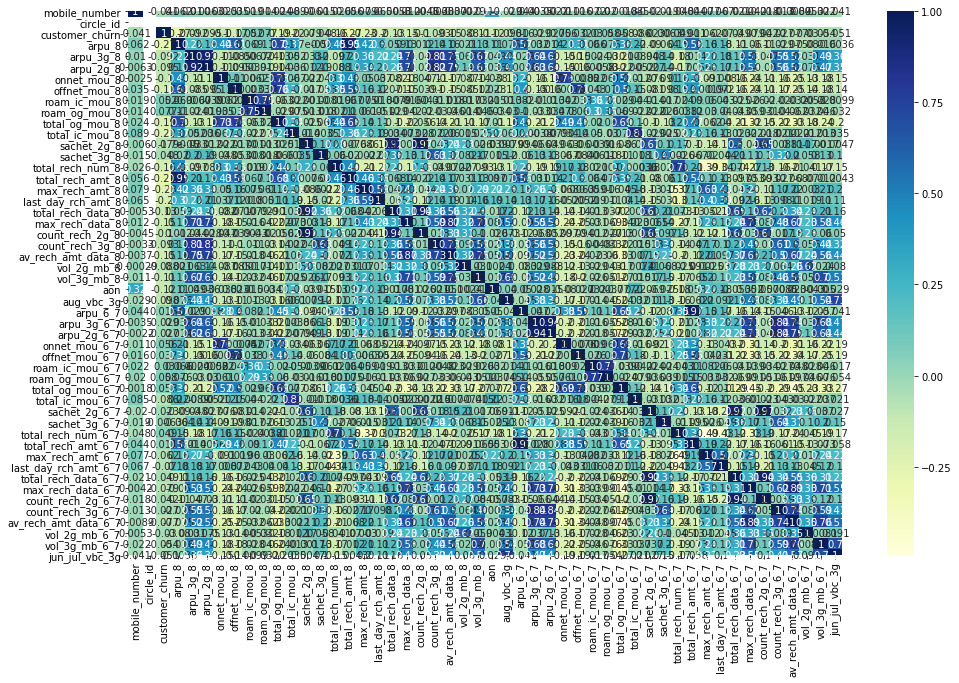

In [592]:
# Let's check the correlation coefficients to see which variables are highly correlated
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [593]:
df_train.corr()

,mobile_number,circle_id,customer_churn,arpu_8,arpu_3g_8,arpu_2g_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,...,max_rech_amt_6_7,last_day_rch_amt_6_7,total_rech_data_6_7,max_rech_data_6_7,count_rech_2g_6_7,count_rech_3g_6_7,av_rech_amt_data_6_7,vol_2g_mb_6_7,vol_3g_mb_6_7,jun_jul_vbc_3g
mobile_number,1.000000,NaN,-0.041211,0.061578,0.010212,0.006333,0.002506,0.034684,0.019476,0.014399,...,0.076732,0.067032,-0.021383,0.004156,-0.018034,-0.013207,-0.008875,0.005314,-0.021746,-0.041361
circle_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_churn,-0.041211,NaN,1.000000,-0.274599,-0.091967,-0.094841,-0.103838,-0.168766,0.052193,0.077440,...,-0.062444,-0.069984,-0.048860,-0.078968,-0.042496,-0.026565,-0.077245,-0.029867,-0.053916,-0.050768
arpu_8,0.061578,NaN,-0.274599,1.000000,0.219355,0.194826,0.439573,0.614969,0.068938,0.111584,...,0.156157,0.183362,-0.108951,-0.059767,-0.105483,-0.029174,-0.075294,-0.079891,-0.016378,-0.003584
arpu_3g_8,0.010212,NaN,-0.091967,0.219355,1.000000,0.921452,-0.111699,-0.085335,-0.006718,-0.023978,...,0.266235,0.183310,0.140086,0.531295,-0.047124,0.549891,0.517687,0.031306,0.493232,0.364234
arpu_2g_8,0.006333,NaN,-0.094841,0.194826,0.921452,1.000000,-0.112361,-0.095008,0.003887,-0.018629,...,0.247174,0.166647,0.158520,0.526474,-0.029875,0.556501,0.518712,0.074622,0.471879,0.346460
onnet_mou_8,0.002506,NaN,-0.103838,0.439573,-0.111699,-0.112361,1.000000,0.108305,-0.006213,0.035251,...,-0.091209,-0.007994,-0.159149,-0.243431,-0.111622,-0.161666,-0.245500,-0.134514,-0.177822,-0.152510
offnet_mou_8,0.034684,NaN,-0.168766,0.614969,-0.085335,-0.095008,0.108305,1.000000,0.000329,0.039409,...,0.001932,0.071861,-0.164145,-0.239744,-0.114642,-0.168097,-0.247337,-0.139933,-0.181087,-0.141747
roam_ic_mou_8,0.019476,NaN,0.052193,0.068938,-0.006718,0.003887,-0.006213,0.000329,1.000000,0.746455,...,0.059922,0.042816,-0.024952,-0.026413,-0.019537,-0.019636,-0.032406,-0.005264,-0.028364,-0.009935
roam_og_mou_8,0.014399,NaN,0.077440,0.111584,-0.023978,-0.018629,0.035251,0.039409,0.746455,1.000000,...,0.029893,0.040392,-0.042575,-0.058641,-0.030885,-0.040375,-0.062294,-0.031684,-0.046066,-0.031999


In [594]:
# Let us see the correlation between jun jul columns and customer churn to understand if multi-colleniarity exists

jun_jul_cols = df_train.filter(regex='_6_7').columns.values.tolist()
jun_jul_cols.extend(['jun_jul_vbc_3g','customer_churn'])
jun_jul_cols

['arpu_6_7',
 'arpu_3g_6_7',
 'arpu_2g_6_7',
 'onnet_mou_6_7',
 'offnet_mou_6_7',
 'roam_ic_mou_6_7',
 'roam_og_mou_6_7',
 'total_og_mou_6_7',
 'total_ic_mou_6_7',
 'sachet_2g_6_7',
 'sachet_3g_6_7',
 'total_rech_num_6_7',
 'total_rech_amt_6_7',
 'max_rech_amt_6_7',
 'last_day_rch_amt_6_7',
 'total_rech_data_6_7',
 'max_rech_data_6_7',
 'count_rech_2g_6_7',
 'count_rech_3g_6_7',
 'av_rech_amt_data_6_7',
 'vol_2g_mb_6_7',
 'vol_3g_mb_6_7',
 'jun_jul_vbc_3g',
 'customer_churn']

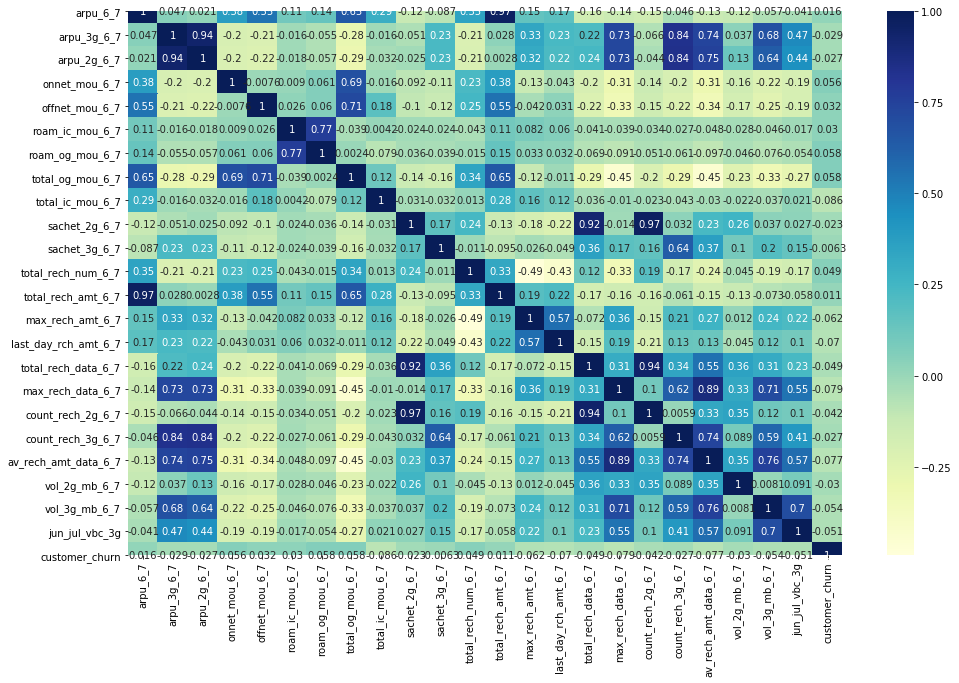

In [595]:
# Let's check the correlation coefficients to see which variables are highly correlated
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (16, 10))
sns.heatmap(df_train[jun_jul_cols].corr(), annot = True, cmap="YlGnBu")
plt.show()

In [596]:
cor = df_train[jun_jul_cols].corr()
corrm = np.corrcoef(df_train[jun_jul_cols].transpose())
corr = corrm - np.diagflat(corrm.diagonal())
print("max corr:",corr.max(), ", min corr: ", corr.min())
c1 = cor.stack().sort_values(ascending=False).drop_duplicates()
high_cor = c1[c1.values!=1]
## change this value to get more correlation results        
thresh = 0.7
print(high_cor[high_cor>thresh])

max corr: 0.9679085565324511 , min corr:  -0.491826083014543
arpu_6_7              total_rech_amt_6_7      0.967909
sachet_2g_6_7         count_rech_2g_6_7       0.967830
count_rech_2g_6_7     total_rech_data_6_7     0.942106
arpu_2g_6_7           arpu_3g_6_7             0.938619
sachet_2g_6_7         total_rech_data_6_7     0.920654
av_rech_amt_data_6_7  max_rech_data_6_7       0.888948
arpu_2g_6_7           count_rech_3g_6_7       0.841331
count_rech_3g_6_7     arpu_3g_6_7             0.835605
roam_og_mou_6_7       roam_ic_mou_6_7         0.767427
av_rech_amt_data_6_7  vol_3g_mb_6_7           0.757323
arpu_2g_6_7           av_rech_amt_data_6_7    0.750315
arpu_3g_6_7           av_rech_amt_data_6_7    0.743459
av_rech_amt_data_6_7  count_rech_3g_6_7       0.738192
arpu_2g_6_7           max_rech_data_6_7       0.731227
arpu_3g_6_7           max_rech_data_6_7       0.728562
total_og_mou_6_7      offnet_mou_6_7          0.714644
vol_3g_mb_6_7         max_rech_data_6_7       0.709960
    

In [597]:
# Let us see the correlation between august columns and customer churn to understand if multi-colleniarity exists

aug_cols = df_train.filter(regex='_8').columns.values.tolist()
aug_cols.extend(['aug_vbc_3g','aon','customer_churn'])
aug_cols

['arpu_8',
 'arpu_3g_8',
 'arpu_2g_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'total_og_mou_8',
 'total_ic_mou_8',
 'sachet_2g_8',
 'sachet_3g_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'av_rech_amt_data_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'aug_vbc_3g',
 'aon',
 'customer_churn']

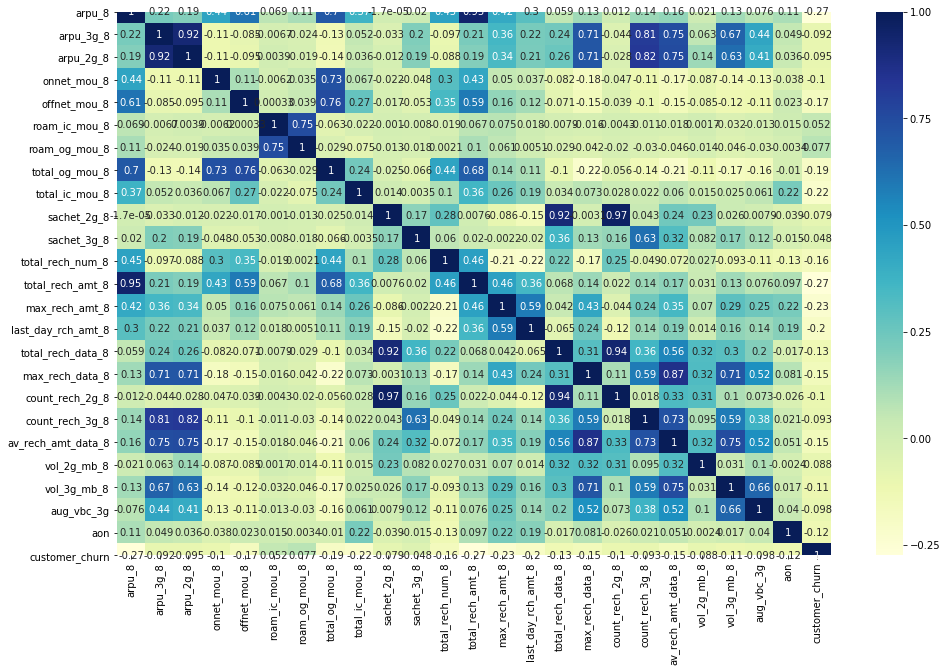

In [598]:
# Let's check the correlation coefficients to see which variables are highly correlated
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (16, 10))
sns.heatmap(df_train[aug_cols].corr(), annot = True, cmap="YlGnBu")
plt.show()

In [599]:
cor = df_train[aug_cols].corr()
corrm = np.corrcoef(df_train[aug_cols].transpose())
corr = corrm - np.diagflat(corrm.diagonal())
print("max corr:",corr.max(), ", min corr: ", corr.min())
c1 = cor.stack().sort_values(ascending=False).drop_duplicates()
high_cor = c1[c1.values!=1]
## change this value to get more correlation results        
thresh = 0.7
print(high_cor[high_cor>thresh])

max corr: 0.9698348215200693 , min corr:  -0.27459913200286884
count_rech_2g_8     sachet_2g_8           0.969835
arpu_8              total_rech_amt_8      0.949390
total_rech_data_8   count_rech_2g_8       0.939057
arpu_3g_8           arpu_2g_8             0.921452
sachet_2g_8         total_rech_data_8     0.919282
max_rech_data_8     av_rech_amt_data_8    0.869396
arpu_2g_8           count_rech_3g_8       0.822420
arpu_3g_8           count_rech_3g_8       0.812327
total_og_mou_8      offnet_mou_8          0.755596
av_rech_amt_data_8  arpu_2g_8             0.752524
                    vol_3g_mb_8           0.749868
roam_og_mou_8       roam_ic_mou_8         0.746455
av_rech_amt_data_8  arpu_3g_8             0.745084
count_rech_3g_8     av_rech_amt_data_8    0.728408
total_og_mou_8      onnet_mou_8           0.728062
max_rech_data_8     arpu_2g_8             0.709249
                    vol_3g_mb_8           0.707338
arpu_3g_8           max_rech_data_8       0.706322
total_og_mou_8     

In [600]:
X_train = df_train.drop(['mobile_number','circle_id','customer_churn'], axis = 1)
y_train = df_train['customer_churn']
X_test = df_test.drop(['mobile_number','circle_id','customer_churn'], axis = 1)
y_test = df_test['customer_churn']

In [601]:
X_train.columns.values.tolist()

['arpu_8',
 'arpu_3g_8',
 'arpu_2g_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'total_og_mou_8',
 'total_ic_mou_8',
 'sachet_2g_8',
 'sachet_3g_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'av_rech_amt_data_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'aon',
 'aug_vbc_3g',
 'arpu_6_7',
 'arpu_3g_6_7',
 'arpu_2g_6_7',
 'onnet_mou_6_7',
 'offnet_mou_6_7',
 'roam_ic_mou_6_7',
 'roam_og_mou_6_7',
 'total_og_mou_6_7',
 'total_ic_mou_6_7',
 'sachet_2g_6_7',
 'sachet_3g_6_7',
 'total_rech_num_6_7',
 'total_rech_amt_6_7',
 'max_rech_amt_6_7',
 'last_day_rch_amt_6_7',
 'total_rech_data_6_7',
 'max_rech_data_6_7',
 'count_rech_2g_6_7',
 'count_rech_3g_6_7',
 'av_rech_amt_data_6_7',
 'vol_2g_mb_6_7',
 'vol_3g_mb_6_7',
 'jun_jul_vbc_3g']

In [602]:
# save X_train and y_train before applying smote
X_train_orig = X_train
y_train_orig = y_train

In [603]:
X_train_orig.shape

(16583, 47)

Handling imbalance data

SMOTE or Synthetic Minority Oversampling Technique.

SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model.


In [604]:
from imblearn.over_sampling import SMOTE

In [605]:
#Applying SMOTE on TRAIN data set hence using PCA_train(x_train) data and y_train data
smote = SMOTE(random_state=27)
df_train_smote, y_train = smote.fit_sample(df_train.drop('customer_churn', axis = 1), df_train['customer_churn'])
df_train_smote

,mobile_number,circle_id,arpu_8,arpu_3g_8,arpu_2g_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,total_og_mou_8,...,max_rech_amt_6_7,last_day_rch_amt_6_7,total_rech_data_6_7,max_rech_data_6_7,count_rech_2g_6_7,count_rech_3g_6_7,av_rech_amt_data_6_7,vol_2g_mb_6_7,vol_3g_mb_6_7,jun_jul_vbc_3g
0,7001385098,109,2.084887,7.154134,4.194980,-0.637800,-0.492201,-0.245868,-0.261002,-0.739036,...,0.552755,1.524972,-0.347188,0.361687,-0.188536,-0.506797,-0.011529,-0.426795,0.450255,0.691566
1,7000686910,109,0.099913,0.771824,0.883795,0.069944,0.622737,2.097115,0.295365,0.446095,...,0.021867,0.068930,0.276078,0.291002,-0.188536,1.351925,0.040172,-0.217004,-0.202028,-0.048007
2,7000491625,109,1.327359,-0.394800,-0.418090,1.110632,0.520696,-0.245868,-0.261002,1.102139,...,-0.848790,-0.328172,-0.658821,-0.804608,-0.520013,-0.506797,-0.798977,-0.436754,-0.529711,-0.465521
3,7001502229,109,-0.125656,-0.406382,-0.418090,-0.237403,-0.243499,-0.245868,-0.261002,-0.305993,...,-1.252265,-0.857642,-0.658821,-0.804608,-0.520013,-0.506797,-0.798977,-0.436754,-0.529711,-0.465521
4,7002285385,109,2.082452,-0.406382,-0.418090,2.352972,2.193468,-0.245868,-0.261002,3.068966,...,-0.243578,0.068930,-0.658821,-0.804608,-0.520013,-0.506797,-0.798977,-0.436754,-0.529711,-0.462190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30599,7000467555,109,0.378130,-0.406382,-0.418090,-0.570047,1.451432,-0.245868,-0.261002,0.673774,...,-0.439361,-0.282606,-0.601228,-0.667444,-0.520013,-0.335042,-0.613760,-0.431894,-0.290245,-0.373318
30600,7000669278,109,-0.441266,0.221248,-0.101693,-0.194045,-0.203193,0.029192,0.047092,-0.270557,...,-0.507611,0.203056,0.586654,-0.071997,0.473294,0.422564,-0.121604,-0.427836,-0.488555,-0.422229
30601,7001352773,109,-0.355095,2.960247,3.301943,-0.651547,-0.917445,-0.040612,-0.255797,-1.040389,...,-0.456318,0.116203,-0.035555,0.441754,-0.402004,1.021063,0.882620,-0.436663,0.692807,-0.137393
30602,7000242302,109,-1.545453,-0.406382,-0.418090,-0.651547,-0.918043,-0.245868,-0.261002,-1.040389,...,0.563595,1.519653,-0.437121,0.251399,-0.520013,0.154365,-0.085992,-0.359488,0.034743,0.625334


In [606]:
y_train.describe()

count    30604.000000
mean         0.500000
std          0.500008
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max          1.000000
Name: customer_churn, dtype: float64

So, after applying SMOTE Train set has 50% churn rows.

In [607]:
X_train = df_train_smote.drop(['mobile_number','circle_id'], axis = 1)
X_train

,arpu_8,arpu_3g_8,arpu_2g_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,total_og_mou_8,total_ic_mou_8,sachet_2g_8,...,max_rech_amt_6_7,last_day_rch_amt_6_7,total_rech_data_6_7,max_rech_data_6_7,count_rech_2g_6_7,count_rech_3g_6_7,av_rech_amt_data_6_7,vol_2g_mb_6_7,vol_3g_mb_6_7,jun_jul_vbc_3g
0,2.084887,7.154134,4.194980,-0.637800,-0.492201,-0.245868,-0.261002,-0.739036,-0.314510,-0.389847,...,0.552755,1.524972,-0.347188,0.361687,-0.188536,-0.506797,-0.011529,-0.426795,0.450255,0.691566
1,0.099913,0.771824,0.883795,0.069944,0.622737,2.097115,0.295365,0.446095,2.783518,-0.389847,...,0.021867,0.068930,0.276078,0.291002,-0.188536,1.351925,0.040172,-0.217004,-0.202028,-0.048007
2,1.327359,-0.394800,-0.418090,1.110632,0.520696,-0.245868,-0.261002,1.102139,-0.370012,-0.389847,...,-0.848790,-0.328172,-0.658821,-0.804608,-0.520013,-0.506797,-0.798977,-0.436754,-0.529711,-0.465521
3,-0.125656,-0.406382,-0.418090,-0.237403,-0.243499,-0.245868,-0.261002,-0.305993,1.139635,-0.389847,...,-1.252265,-0.857642,-0.658821,-0.804608,-0.520013,-0.506797,-0.798977,-0.436754,-0.529711,-0.465521
4,2.082452,-0.406382,-0.418090,2.352972,2.193468,-0.245868,-0.261002,3.068966,0.584234,-0.389847,...,-0.243578,0.068930,-0.658821,-0.804608,-0.520013,-0.506797,-0.798977,-0.436754,-0.529711,-0.462190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30599,0.378130,-0.406382,-0.418090,-0.570047,1.451432,-0.245868,-0.261002,0.673774,-0.213319,-0.389847,...,-0.439361,-0.282606,-0.601228,-0.667444,-0.520013,-0.335042,-0.613760,-0.431894,-0.290245,-0.373318
30600,-0.441266,0.221248,-0.101693,-0.194045,-0.203193,0.029192,0.047092,-0.270557,-0.198578,3.392379,...,-0.507611,0.203056,0.586654,-0.071997,0.473294,0.422564,-0.121604,-0.427836,-0.488555,-0.422229
30601,-0.355095,2.960247,3.301943,-0.651547,-0.917445,-0.040612,-0.255797,-1.040389,-0.992228,-0.165174,...,-0.456318,0.116203,-0.035555,0.441754,-0.402004,1.021063,0.882620,-0.436663,0.692807,-0.137393
30602,-1.545453,-0.406382,-0.418090,-0.651547,-0.918043,-0.245868,-0.261002,-1.040389,-0.993099,-0.389847,...,0.563595,1.519653,-0.437121,0.251399,-0.520013,0.154365,-0.085992,-0.359488,0.034743,0.625334


# Feature Selection Using RFE


In [608]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [609]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [610]:
rfe.support_

array([False, False, False,  True,  True, False, False, False,  True,
        True, False,  True, False, False,  True,  True,  True, False,
       False, False, False, False,  True, False, False, False,  True,
        True,  True, False, False,  True,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [611]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_8', False, 20),
 ('arpu_3g_8', False, 2),
 ('arpu_2g_8', False, 5),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_8', False, 25),
 ('roam_og_mou_8', False, 3),
 ('total_og_mou_8', False, 4),
 ('total_ic_mou_8', True, 1),
 ('sachet_2g_8', True, 1),
 ('sachet_3g_8', False, 28),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_8', False, 33),
 ('max_rech_amt_8', False, 19),
 ('last_day_rch_amt_8', True, 1),
 ('total_rech_data_8', True, 1),
 ('max_rech_data_8', True, 1),
 ('count_rech_2g_8', False, 10),
 ('count_rech_3g_8', False, 11),
 ('av_rech_amt_data_8', False, 29),
 ('vol_2g_mb_8', False, 7),
 ('vol_3g_mb_8', False, 26),
 ('aon', True, 1),
 ('aug_vbc_3g', False, 12),
 ('arpu_6_7', False, 14),
 ('arpu_3g_6_7', False, 8),
 ('arpu_2g_6_7', True, 1),
 ('onnet_mou_6_7', True, 1),
 ('offnet_mou_6_7', True, 1),
 ('roam_ic_mou_6_7', False, 24),
 ('roam_og_mou_6_7', False, 30),
 ('total_og_mou_6_7', True, 1),
 ('total_ic_mou_6_7', True, 1),
 ('sachet_2g_6_7', 

In [612]:
col = X_train.columns[rfe.support_]

In [613]:
X_train.columns[~rfe.support_]

Index(['arpu_8', 'arpu_3g_8', 'arpu_2g_8', 'roam_ic_mou_8', 'roam_og_mou_8',
       'total_og_mou_8', 'sachet_3g_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'count_rech_2g_8', 'count_rech_3g_8', 'av_rech_amt_data_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'aug_vbc_3g', 'arpu_6_7', 'arpu_3g_6_7',
       'roam_ic_mou_6_7', 'roam_og_mou_6_7', 'sachet_2g_6_7', 'sachet_3g_6_7',
       'total_rech_amt_6_7', 'max_rech_amt_6_7', 'last_day_rch_amt_6_7',
       'total_rech_data_6_7', 'max_rech_data_6_7', 'count_rech_2g_6_7',
       'count_rech_3g_6_7', 'av_rech_amt_data_6_7', 'vol_2g_mb_6_7',
       'vol_3g_mb_6_7', 'jun_jul_vbc_3g'],
      dtype='object')

In [614]:
#Let us check the correlation beween RFE Columns
cor = X_train[col].corr()
corrm = np.corrcoef(X_train[col].transpose())
corr = corrm - np.diagflat(corrm.diagonal())
print("max corr:",corr.max(), ", min corr: ", corr.min())
c1 = cor.stack().sort_values(ascending=False).drop_duplicates()
high_cor = c1[c1.values!=1]
## change this value to get more correlation results        
thresh = 0.7
print(high_cor[high_cor>thresh])

max corr: 0.9197100602190263 , min corr:  -0.31458748497877076
sachet_2g_8       total_rech_data_8    0.919710
total_ic_mou_6_7  total_ic_mou_8       0.712874
dtype: float64


##### Assessing the model with StatsModels

In [615]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         customer_churn   No. Observations:                30604
Model:                            GLM   Df Residuals:                    30588
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11388.
Date:                Mon, 13 Apr 2020   Deviance:                       22776.
Time:                        21:21:01   Pearson chi2:                 5.73e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.7801      0.028    -63.301      0.000      -1.835      -1.725
onnet_mou_8           -0.3878      0.031    -12.381      0.000      -0.449      -0.326
offnet_mou_8          -0.5821      0.037    -15.933      0.000      -0.654      -0.511
total_ic_mou_8        -1.9811      0.056    -35.361      0.000      -2.091      -1.871
sachet_2g_8            0.6222      0.102      6.121      0.000       0.423       0.821
total_rech_num_8      -0.6009      0.035    -17.069      0.000      -0.670      -0.532
last_day_rch_amt_8    -0.7772      0.028    -28.054      0.000      -0.832      -0.723
total_rech_data_8     -0.9982      0.109     -9.123      0.000      -1.213      -0.784
max_rech_data_8       -0.5110      0.041    -12.436      0.000      -0.592      -0.430
aon                   -0.2940      0.021    -13.740      0.000      -0.336      -0.252
arpu_2g_6_7            0.3628      0.025     14.756      0.000       0.315       0.411
onnet_mou_6_7          1.9099      0.142     13.444      0.000       1.631       2.188
offnet_mou_6_7         1.9830      0.146     13.576      0.000       1.697       2.269
total_og_mou_6_7      -2.2073      0.200    -11.056      0.000      -2.599      -1.816
total_ic_mou_6_7       0.8520      0.039     21.992      0.000       0.776       0.928
total_rech_num_6_7     0.2622      0.028      9.504      0.000       0.208       0.316
======================================================================================
"""

In [616]:

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [617]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,total_og_mou_6_7,127.79
11,offnet_mou_6_7,69.18
10,onnet_mou_6_7,67.35
6,total_rech_data_8,19.56
3,sachet_2g_8,16.21
7,max_rech_data_8,3.51
2,total_ic_mou_8,3.50
4,total_rech_num_8,3.06
1,offnet_mou_8,2.71
13,total_ic_mou_6_7,2.45


All the RFE columns have less probability. But few of the columns have high VIF. So we will drop total_og_mou_6_7 due to very high VIF.

In [618]:
X_train  = X_train[col].drop(['total_og_mou_6_7'], axis = 1)

In [619]:
X_train.columns

Index(['onnet_mou_8', 'offnet_mou_8', 'total_ic_mou_8', 'sachet_2g_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'total_rech_data_8',
       'max_rech_data_8', 'aon', 'arpu_2g_6_7', 'onnet_mou_6_7',
       'offnet_mou_6_7', 'total_ic_mou_6_7', 'total_rech_num_6_7'],
      dtype='object')

In [620]:
#Let us create the model again with these columns
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res3 = logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         customer_churn   No. Observations:                30604
Model:                            GLM   Df Residuals:                    30589
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11453.
Date:                Mon, 13 Apr 2020   Deviance:                       22905.
Time:                        21:21:01   Pearson chi2:                 5.65e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.7771      0.028    -63.227      0.000      -1.832      -1.722
onnet_mou_8           -0.3853      0.031    -12.301      0.000      -0.447      -0.324
offnet_mou_8          -0.5910      0.037    -16.138      0.000      -0.663      -0.519
total_ic_mou_8        -1.9859      0.056    -35.409      0.000      -2.096      -1.876
sachet_2g_8            0.6268      0.102      6.166      0.000       0.428       0.826
total_rech_num_8      -0.5959      0.035    -16.973      0.000      -0.665      -0.527
last_day_rch_amt_8    -0.7694      0.027    -28.002      0.000      -0.823      -0.716
total_rech_data_8     -1.0074      0.109     -9.204      0.000      -1.222      -0.793
max_rech_data_8       -0.5296      0.041    -12.892      0.000      -0.610      -0.449
aon                   -0.2785      0.021    -13.113      0.000      -0.320      -0.237
arpu_2g_6_7            0.3577      0.025     14.560      0.000       0.310       0.406
onnet_mou_6_7          0.3701      0.027     13.801      0.000       0.318       0.423
offnet_mou_6_7         0.3975      0.027     14.776      0.000       0.345       0.450
total_ic_mou_6_7       0.8261      0.039     21.390      0.000       0.750       0.902
total_rech_num_6_7     0.2395      0.027      8.729      0.000       0.186       0.293
======================================================================================
"""

Let us check the VIF also again

In [621]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,total_rech_data_8,19.56
3,sachet_2g_8,16.21
7,max_rech_data_8,3.51
2,total_ic_mou_8,3.50
4,total_rech_num_8,3.06
1,offnet_mou_8,2.71
12,total_ic_mou_6_7,2.43
0,onnet_mou_8,2.24
13,total_rech_num_6_7,2.13
10,onnet_mou_6_7,1.97


In [622]:
X_train.columns

Index(['onnet_mou_8', 'offnet_mou_8', 'total_ic_mou_8', 'sachet_2g_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'total_rech_data_8',
       'max_rech_data_8', 'aon', 'arpu_2g_6_7', 'onnet_mou_6_7',
       'offnet_mou_6_7', 'total_ic_mou_6_7', 'total_rech_num_6_7'],
      dtype='object')


total_rech_data_8 column has high VIF. Let us remove it.

In [623]:
X_train  = X_train.drop(['total_rech_data_8'], axis = 1)

In [624]:
X_train.columns

Index(['onnet_mou_8', 'offnet_mou_8', 'total_ic_mou_8', 'sachet_2g_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'max_rech_data_8', 'aon',
       'arpu_2g_6_7', 'onnet_mou_6_7', 'offnet_mou_6_7', 'total_ic_mou_6_7',
       'total_rech_num_6_7'],
      dtype='object')

In [625]:
#Let us find the model and VIF again

In [626]:
#Let us create the model again with these columns
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res4 = logm4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         customer_churn   No. Observations:                30604
Model:                            GLM   Df Residuals:                    30590
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11501.
Date:                Mon, 13 Apr 2020   Deviance:                       23002.
Time:                        21:21:02   Pearson chi2:                 5.69e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.7574      0.028    -63.121      0.000      -1.812      -1.703
onnet_mou_8           -0.3757      0.031    -12.000      0.000      -0.437      -0.314
offnet_mou_8          -0.5810      0.037    -15.908      0.000      -0.653      -0.509
total_ic_mou_8        -1.9802      0.056    -35.360      0.000      -2.090      -1.870
sachet_2g_8           -0.2865      0.025    -11.645      0.000      -0.335      -0.238
total_rech_num_8      -0.6216      0.035    -17.715      0.000      -0.690      -0.553
last_day_rch_amt_8    -0.7800      0.028    -28.281      0.000      -0.834      -0.726
max_rech_data_8       -0.8116      0.029    -28.396      0.000      -0.868      -0.756
aon                   -0.2774      0.021    -13.088      0.000      -0.319      -0.236
arpu_2g_6_7            0.3293      0.024     13.691      0.000       0.282       0.376
onnet_mou_6_7          0.3715      0.027     13.849      0.000       0.319       0.424
offnet_mou_6_7         0.4026      0.027     14.988      0.000       0.350       0.455
total_ic_mou_6_7       0.8214      0.039     21.327      0.000       0.746       0.897
total_rech_num_6_7     0.2439      0.027      8.873      0.000       0.190       0.298
======================================================================================
"""

Let us check VIF also.

In [627]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,total_ic_mou_8,3.50
4,total_rech_num_8,3.03
1,offnet_mou_8,2.71
11,total_ic_mou_6_7,2.43
0,onnet_mou_8,2.24
12,total_rech_num_6_7,2.12
9,onnet_mou_6_7,1.97
10,offnet_mou_6_7,1.89
6,max_rech_data_8,1.70
5,last_day_rch_amt_8,1.57


We are good with both Probabily and VIF. Let us use this model for computing metrics.

In [628]:
y_train_pred = res4.predict(X_train_sm).values.reshape(-1)
y_train_pred 

array([0.04789451, 0.01171485, 0.01695967, ..., 0.15034376, 0.95909038,
       0.92742503])

Creating a dataframe with the actual churn flag and the predicted probabilities


In [629]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred, 'mobile_number':df_train_smote['mobile_number']})
#y_train_pred_final['mobile_number'] = df_train['mobile_number']
y_train_pred_final.head()

,Churn,Churn_Prob,mobile_number
0,0,0.047895,7001385098
1,0,0.011715,7000686910
2,0,0.016960,7000491625
3,0,0.077521,7001502229
4,0,0.025770,7002285385


Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0


In [630]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,mobile_number,predicted
0,0,0.047895,7001385098,0
1,0,0.011715,7000686910,0
2,0,0.016960,7000491625,0
3,0,0.077521,7001502229,0
4,0,0.025770,7002285385,0


In [631]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, accuracy_score
# Confusion matrix 
confusion = confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[12936  2366]
 [ 2223 13079]]


In [632]:
# Actual/Predicted     not_churn    churn
        # not_churn        12936     2366
        # churn            82223    13079  

In [633]:
# Let's check the overall accuracy.
accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.8500522807476147

## Metrics beyond simply accuracy


In [634]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [635]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8547248725656776

In [636]:
# Let us calculate specificity
TN / float(TN+FP)

0.8453796889295517

In [637]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1546203110704483


### Finding Optimal Cutoff Point


Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [638]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,mobile_number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.047895,7001385098,0,1,0,0,0,0,0,0,0,0,0
1,0,0.011715,7000686910,0,1,0,0,0,0,0,0,0,0,0
2,0,0.016960,7000491625,0,1,0,0,0,0,0,0,0,0,0
3,0,0.077521,7001502229,0,1,0,0,0,0,0,0,0,0,0
4,0,0.025770,7002285385,0,1,0,0,0,0,0,0,0,0,0


In [639]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.703764  0.976408  0.431120
0.2   0.2  0.774213  0.949941  0.598484
0.3   0.3  0.814273  0.922755  0.705790
0.4   0.4  0.840184  0.892236  0.788132
0.5   0.5  0.850052  0.854725  0.845380
0.6   0.6  0.844759  0.802771  0.886747
0.7   0.7  0.829597  0.739054  0.920141
0.8   0.8  0.790256  0.631944  0.948569
0.9   0.9  0.687819  0.400405  0.975232


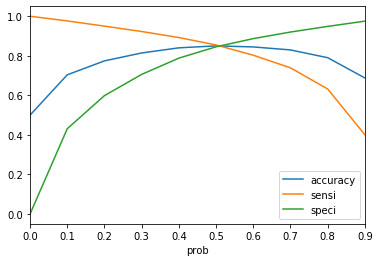

In [640]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.5 is the optimum point to take it as a cutoff probability.


In [641]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,mobile_number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.047895,7001385098,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.011715,7000686910,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.016960,7000491625,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.077521,7001502229,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.025770,7002285385,0,1,0,0,0,0,0,0,0,0,0,0


In [642]:
# Let's check the overall accuracy.
accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8500522807476147

In [643]:
confusion2 = confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[12936,  2366],
       [ 2223, 13079]], dtype=int64)

In [644]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [645]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8547248725656776

In [646]:
# Let us calculate specificity
TN / float(TN+FP)

0.8453796889295517

In [647]:
##### Precision
TP /(TP + FP)

0.8468112657818064

In [648]:
# Recall
TP /(TP + FN)

0.8547248725656776

## Making predictions on the test set


In [649]:
X_test = X_test[X_train.columns]
X_test.head()

,onnet_mou_8,offnet_mou_8,total_ic_mou_8,sachet_2g_8,total_rech_num_8,last_day_rch_amt_8,max_rech_data_8,aon,arpu_2g_6_7,onnet_mou_6_7,offnet_mou_6_7,total_ic_mou_6_7,total_rech_num_6_7
85287,-0.651547,-0.918043,-0.850919,0.241238,-1.086347,0.115076,0.399755,2.432081,-0.503144,-0.758611,-0.864352,-0.584770,-0.856527
83377,-0.478155,0.786756,1.370309,-0.389847,-0.538924,0.451005,-0.682066,-0.950264,-0.503144,-0.507181,0.524413,0.338689,-0.482509
1424,-0.450048,-0.689649,-0.579045,-0.389847,0.008500,-0.913707,1.249757,1.169859,0.736147,-0.583373,-0.780065,-0.508005,0.714349
66802,-0.650690,-0.910591,-0.967334,-0.389847,-0.812635,1.731734,2.099758,-0.938976,2.671395,-0.759850,-1.074690,-1.063879,-0.856527
22397,-0.197906,0.939788,1.845616,-0.389847,-0.402068,0.597973,-0.682066,1.834834,-0.503144,-0.470928,0.538040,1.077868,-0.482509


In [650]:
X_test_sm = sm.add_constant(X_test)


Making predictions on the test set

In [651]:
y_test_pred = res4.predict(X_test_sm)

In [652]:
y_test_pred[:10]

85287    0.220698
83377    0.021483
1424     0.251234
66802    0.103022
22397    0.004965
5114     0.056835
94903    0.055313
67035    0.005958
170      0.003892
33577    0.111661
dtype: float64

In [653]:
# Renaming the column 
y_test_pred=y_test_pred.rename(columns={ 0 : 'Churn_Prob'})

y_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred, 'mobile_number':df_test['mobile_number']})

# Let's see the head of y_pred_final
y_pred_final.head()

,Churn,Churn_Prob,mobile_number
85287,0,0.220698,7001587688
83377,0,0.021483,7000430292
1424,0,0.251234,7001815493
66802,0,0.103022,7000542480
22397,0,0.004965,7001320216


In [654]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [655]:
y_pred_final.head()

,Churn,Churn_Prob,mobile_number,final_predicted
85287,0,0.220698,7001587688,0
83377,0,0.021483,7000430292,0
1424,0,0.251234,7001815493,0
66802,0,0.103022,7000542480,0
22397,0,0.004965,7001320216,0


In [656]:
# Let's check the overall accuracy.
accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.8376248768819474

In [657]:
confusion2 =confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[5543, 1058],
       [  96,  410]], dtype=int64)

In [658]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [659]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8102766798418972

In [660]:
# Let us calculate specificity
TN / float(TN+FP)

0.8397212543554007

In [661]:
y_pred_final['final_predicted'].unique()

array([0, 1], dtype=int64)

In [662]:
y_pred_final.describe()

,Churn,Churn_Prob,mobile_number,final_predicted
count,7107.000000,7107.000000,7.107000e+03,7107.000000
mean,0.071197,0.271073,7.001231e+09,0.206557
std,0.257172,0.287668,6.836833e+05,0.404863
min,0.000000,0.000002,7.000000e+09,0.000000
25%,0.000000,0.039987,7.000642e+09,0.000000
50%,0.000000,0.153928,7.001243e+09,0.000000
75%,0.000000,0.422016,7.001815e+09,0.000000
max,1.000000,0.997252,7.002410e+09,1.000000


In [663]:
y_pred_final.loc[y_pred_final['final_predicted'] == 1]

,Churn,Churn_Prob,mobile_number,final_predicted
94587,0,0.930062,7000434646,1
96212,0,0.627800,7000341342,1
68178,0,0.681327,7001208912,1
45251,0,0.640000,7000108118,1
27152,1,0.832876,7001873660,1
...,...,...,...,...
22774,0,0.518293,7000549098,1
8020,0,0.684998,7000567154,1
25865,0,0.972546,7000901768,1
83545,1,0.916229,7001382904,1


i.e in the test data, actual churn percentage is 7.1%, but 20% predicted as churn with this model. 

Telecom Company can handle these predicted customers with measures like good service and discouts to retain them.

In [664]:
y_pred_final

,Churn,Churn_Prob,mobile_number,final_predicted
85287,0,0.220698,7001587688,0
83377,0,0.021483,7000430292,0
1424,0,0.251234,7001815493,0
66802,0,0.103022,7000542480,0
22397,0,0.004965,7001320216,0
...,...,...,...,...
996,0,0.109702,7000061103,0
1617,0,0.621878,7001654693,1
76224,0,0.007230,7002083620,0
41244,0,0.182815,7001702871,0


In [665]:
X_test

,onnet_mou_8,offnet_mou_8,total_ic_mou_8,sachet_2g_8,total_rech_num_8,last_day_rch_amt_8,max_rech_data_8,aon,arpu_2g_6_7,onnet_mou_6_7,offnet_mou_6_7,total_ic_mou_6_7,total_rech_num_6_7
85287,-0.651547,-0.918043,-0.850919,0.241238,-1.086347,0.115076,0.399755,2.432081,-0.503144,-0.758611,-0.864352,-0.584770,-0.856527
83377,-0.478155,0.786756,1.370309,-0.389847,-0.538924,0.451005,-0.682066,-0.950264,-0.503144,-0.507181,0.524413,0.338689,-0.482509
1424,-0.450048,-0.689649,-0.579045,-0.389847,0.008500,-0.913707,1.249757,1.169859,0.736147,-0.583373,-0.780065,-0.508005,0.714349
66802,-0.650690,-0.910591,-0.967334,-0.389847,-0.812635,1.731734,2.099758,-0.938976,2.671395,-0.759850,-1.074690,-1.063879,-0.856527
22397,-0.197906,0.939788,1.845616,-0.389847,-0.402068,0.597973,-0.682066,1.834834,-0.503144,-0.470928,0.538040,1.077868,-0.482509
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,-0.636544,-0.875263,-0.870555,-0.389847,-1.086347,1.731734,2.099758,-1.050831,2.840112,-0.724573,-0.990671,-1.083194,-0.856527
1617,-0.644719,-0.906267,-0.253900,-0.389847,-0.675779,-0.913707,2.099758,-0.771706,4.541573,-0.668614,-0.629733,0.407592,-0.407705
76224,0.012810,1.485641,1.624023,-0.389847,0.008500,0.660960,-0.682066,0.762458,-0.503144,-0.343656,0.900472,1.192906,-0.258098
41244,-0.530942,-0.603826,-0.059131,4.658827,1.650772,-0.808729,-0.406091,0.212417,-0.456956,-0.512959,-0.561060,1.558863,1.387582


In [666]:
test_data = y_pred_final.merge(X_test, left_index = True, right_index = True)
test_data

,Churn,Churn_Prob,mobile_number,final_predicted,onnet_mou_8,offnet_mou_8,total_ic_mou_8,sachet_2g_8,total_rech_num_8,last_day_rch_amt_8,max_rech_data_8,aon,arpu_2g_6_7,onnet_mou_6_7,offnet_mou_6_7,total_ic_mou_6_7,total_rech_num_6_7
85287,0,0.220698,7001587688,0,-0.651547,-0.918043,-0.850919,0.241238,-1.086347,0.115076,0.399755,2.432081,-0.503144,-0.758611,-0.864352,-0.584770,-0.856527
83377,0,0.021483,7000430292,0,-0.478155,0.786756,1.370309,-0.389847,-0.538924,0.451005,-0.682066,-0.950264,-0.503144,-0.507181,0.524413,0.338689,-0.482509
1424,0,0.251234,7001815493,0,-0.450048,-0.689649,-0.579045,-0.389847,0.008500,-0.913707,1.249757,1.169859,0.736147,-0.583373,-0.780065,-0.508005,0.714349
66802,0,0.103022,7000542480,0,-0.650690,-0.910591,-0.967334,-0.389847,-0.812635,1.731734,2.099758,-0.938976,2.671395,-0.759850,-1.074690,-1.063879,-0.856527
22397,0,0.004965,7001320216,0,-0.197906,0.939788,1.845616,-0.389847,-0.402068,0.597973,-0.682066,1.834834,-0.503144,-0.470928,0.538040,1.077868,-0.482509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0,0.109702,7000061103,0,-0.636544,-0.875263,-0.870555,-0.389847,-1.086347,1.731734,2.099758,-1.050831,2.840112,-0.724573,-0.990671,-1.083194,-0.856527
1617,0,0.621878,7001654693,1,-0.644719,-0.906267,-0.253900,-0.389847,-0.675779,-0.913707,2.099758,-0.771706,4.541573,-0.668614,-0.629733,0.407592,-0.407705
76224,0,0.007230,7002083620,0,0.012810,1.485641,1.624023,-0.389847,0.008500,0.660960,-0.682066,0.762458,-0.503144,-0.343656,0.900472,1.192906,-0.258098
41244,0,0.182815,7001702871,0,-0.530942,-0.603826,-0.059131,4.658827,1.650772,-0.808729,-0.406091,0.212417,-0.456956,-0.512959,-0.561060,1.558863,1.387582


In [667]:
# Equation based of coefficients from the final logistic regression model:
test_data['odds'] = -1.7574 + test_data['onnet_mou_8'] *( -0.3757) + test_data['offnet_mou_8'] *( -0.581) + test_data['total_ic_mou_8'] *( -1.9802) + test_data['sachet_2g_8'] *( -0.2865) + test_data['total_rech_num_8'] *( -0.6216) + test_data['last_day_rch_amt_8'] *( -0.78) + test_data['max_rech_data_8'] *( -0.8116) + test_data['aon'] *( -0.2774) + test_data['arpu_2g_6_7'] *( 0.3293) + test_data['onnet_mou_6_7'] *( 0.3715) + test_data['offnet_mou_6_7'] *( 0.4026) + test_data['total_ic_mou_6_7'] *( 0.8214) + test_data['total_rech_num_6_7'] *( 0.2439)
test_data

,Churn,Churn_Prob,mobile_number,final_predicted,onnet_mou_8,offnet_mou_8,total_ic_mou_8,sachet_2g_8,total_rech_num_8,last_day_rch_amt_8,max_rech_data_8,aon,arpu_2g_6_7,onnet_mou_6_7,offnet_mou_6_7,total_ic_mou_6_7,total_rech_num_6_7,odds
85287,0,0.220698,7001587688,0,-0.651547,-0.918043,-0.850919,0.241238,-1.086347,0.115076,0.399755,2.432081,-0.503144,-0.758611,-0.864352,-0.584770,-0.856527,-1.261675
83377,0,0.021483,7000430292,0,-0.478155,0.786756,1.370309,-0.389847,-0.538924,0.451005,-0.682066,-0.950264,-0.503144,-0.507181,0.524413,0.338689,-0.482509,-3.818737
1424,0,0.251234,7001815493,0,-0.450048,-0.689649,-0.579045,-0.389847,0.008500,-0.913707,1.249757,1.169859,0.736147,-0.583373,-0.780065,-0.508005,0.714349,-1.092139
66802,0,0.103022,7000542480,0,-0.650690,-0.910591,-0.967334,-0.389847,-0.812635,1.731734,2.099758,-0.938976,2.671395,-0.759850,-1.074690,-1.063879,-0.856527,-2.164028
22397,0,0.004965,7001320216,0,-0.197906,0.939788,1.845616,-0.389847,-0.402068,0.597973,-0.682066,1.834834,-0.503144,-0.470928,0.538040,1.077868,-0.482509,-5.300317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0,0.109702,7000061103,0,-0.636544,-0.875263,-0.870555,-0.389847,-1.086347,1.731734,2.099758,-1.050831,2.840112,-0.724573,-0.990671,-1.083194,-0.856527,-2.093718
1617,0,0.621878,7001654693,1,-0.644719,-0.906267,-0.253900,-0.389847,-0.675779,-0.913707,2.099758,-0.771706,4.541573,-0.668614,-0.629733,0.407592,-0.407705,0.497466
76224,0,0.007230,7002083620,0,0.012810,1.485641,1.624023,-0.389847,0.008500,0.660960,-0.682066,0.762458,-0.503144,-0.343656,0.900472,1.192906,-0.258098,-4.922264
41244,0,0.182815,7001702871,0,-0.530942,-0.603826,-0.059131,4.658827,1.650772,-0.808729,-0.406091,0.212417,-0.456956,-0.512959,-0.561060,1.558863,1.387582,-1.497458


#In the model, below are the co-efficients in asceding order:

const	-1.7574

total_ic_mou_6_7	0.8214
offnet_mou_6_7	0.4026
onnet_mou_6_7	0.3715
arpu_2g_6_7	0.3293
total_rech_num_6_7	0.2439
aon	-0.2774
sachet_2g_8	-0.2865
onnet_mou_8	-0.3757
offnet_mou_8	-0.581
total_rech_num_8	-0.6216
last_day_rch_amt_8	-0.78
max_rech_data_8	-0.8116
total_ic_mou_8	-1.9802

i.e good phase features have possitive coefficients and action phase coefficients have negative coefficients.

So if action phase features values increase, odds will decrease, which will result in Churn probability decrease. 
if action phase features values decrease, odds will increase, which will result in Churn probability increase. 

## Conclusion: 
### 1) If any customer uses less network (calls or data) in action phase when compared to good phase, we can predict that he is planning to churn in near future and Telecom Company has to take actions to retain those customers.

### 2) If Age on Network (AON) of a customer increase, it is less likely that he will leave the Telecom network. New customers are more prone to shift the network.


# PCA on the data
Note -¶
While computng the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
So we'll calculate the PCs using the train data, and apply them later on the test data

In [668]:
X_train = df_train.drop(['mobile_number','circle_id','customer_churn'],axis=1)
X_train


,arpu_8,arpu_3g_8,arpu_2g_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,total_og_mou_8,total_ic_mou_8,sachet_2g_8,...,max_rech_amt_6_7,last_day_rch_amt_6_7,total_rech_data_6_7,max_rech_data_6_7,count_rech_2g_6_7,count_rech_3g_6_7,av_rech_amt_data_6_7,vol_2g_mb_6_7,vol_3g_mb_6_7,jun_jul_vbc_3g
41800,2.084887,7.154134,4.194980,-0.637800,-0.492201,-0.245868,-0.261002,-0.739036,-0.314510,-0.389847,...,0.552755,1.524972,-0.347188,0.361687,-0.188536,-0.506797,-0.011529,-0.426795,0.450255,0.691566
72137,0.099913,0.771824,0.883795,0.069944,0.622737,2.097115,0.295365,0.446095,2.783518,-0.389847,...,0.021867,0.068930,0.276078,0.291002,-0.188536,1.351925,0.040172,-0.217004,-0.202028,-0.048007
16447,1.327359,-0.394800,-0.418090,1.110632,0.520696,-0.245868,-0.261002,1.102139,-0.370012,-0.389847,...,-0.848790,-0.328172,-0.658821,-0.804608,-0.520013,-0.506797,-0.798977,-0.436754,-0.529711,-0.465521
60415,-0.125656,-0.406382,-0.418090,-0.237403,-0.243499,-0.245868,-0.261002,-0.305993,1.139635,-0.389847,...,-1.252265,-0.857642,-0.658821,-0.804608,-0.520013,-0.506797,-0.798977,-0.436754,-0.529711,-0.465521
5805,2.082452,-0.406382,-0.418090,2.352972,2.193468,-0.245868,-0.261002,3.068966,0.584234,-0.389847,...,-0.243578,0.068930,-0.658821,-0.804608,-0.520013,-0.506797,-0.798977,-0.436754,-0.529711,-0.462190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,1.112301,1.837778,1.844718,-0.103050,0.324972,-0.245868,-0.261002,0.172264,-0.385335,1.503406,...,0.998701,-0.328172,-0.035555,2.164142,-0.520013,1.351925,1.205435,-0.381476,1.325139,2.115860
51123,0.195713,-0.406382,-0.418090,-0.181065,1.170782,-0.245868,-0.261002,0.709155,-0.659555,-0.389847,...,-0.041840,-0.235515,-0.347188,0.361687,-0.188536,-0.506797,-0.011529,-0.225322,0.655870,1.125906
59843,2.040191,4.341960,3.146603,0.358644,0.353843,0.596320,0.114317,0.464931,0.784678,-0.389847,...,1.508353,2.716279,-0.347188,0.102510,-0.188536,-0.506797,-0.186518,-0.395581,-0.438454,-0.285912
98465,-0.062007,-0.406382,-0.247875,-0.512754,-0.479636,-0.245868,-0.261002,-0.648508,1.304024,-0.389847,...,-0.041840,0.783715,-0.035555,1.009628,0.142941,-0.506797,0.425941,0.943591,-0.529711,-0.465521


In [669]:
y_train=df_train['customer_churn']
y_train

41800    0
72137    0
16447    0
60415    0
5805     0
        ..
407      0
51123    0
59843    0
98465    0
23435    0
Name: customer_churn, Length: 16583, dtype: int64

In [670]:
from sklearn.decomposition import PCA

In [671]:
pca = PCA(random_state=42)
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [672]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [673]:
# Components from the PCA
pca.components_

array([[-2.66906221e-02,  2.22479631e-01,  2.23012494e-01, ...,
         8.52495226e-02,  2.31111089e-01,  1.87984016e-01],
       [ 2.91116325e-01,  1.49348525e-01,  1.36586544e-01, ...,
        -1.02000397e-01,  5.44504175e-02,  4.72370579e-02],
       [ 2.18414264e-01,  1.50364493e-02,  2.12235002e-02, ...,
         8.26050748e-02, -1.55241022e-02, -1.11136965e-02],
       ...,
       [-9.33505243e-04,  3.15154417e-04,  1.47799893e-04, ...,
        -3.94434758e-05,  1.52210608e-04, -1.02936662e-04],
       [-1.90565348e-16, -1.62848063e-16,  4.86802202e-16, ...,
        -1.30081969e-17,  6.47182977e-17,  6.57867248e-17],
       [-0.00000000e+00, -6.87922685e-16,  4.58835123e-16, ...,
        -2.26249394e-16,  1.84824852e-16,  1.16595730e-16]])

In [674]:
# variance ratio for each component
pca.explained_variance_ratio_

array([2.27131618e-01, 1.33843062e-01, 1.09242992e-01, 5.83196145e-02,
       5.12884730e-02, 3.96416635e-02, 3.70843076e-02, 3.47105910e-02,
       3.11977737e-02, 3.03929577e-02, 2.65003268e-02, 2.40823484e-02,
       2.34828261e-02, 1.97214927e-02, 1.84869050e-02, 1.71172489e-02,
       1.31173611e-02, 1.14674678e-02, 1.09861842e-02, 1.01189952e-02,
       8.55652125e-03, 8.31702851e-03, 6.22884020e-03, 5.98763234e-03,
       5.84716994e-03, 5.42463781e-03, 4.53854729e-03, 3.91174444e-03,
       3.49831277e-03, 3.23485512e-03, 3.19508824e-03, 2.07940763e-03,
       1.96539882e-03, 1.83905837e-03, 1.59188970e-03, 1.31991664e-03,
       1.09791356e-03, 9.45332261e-04, 8.44369968e-04, 6.31624075e-04,
       5.11608105e-04, 3.51247935e-04, 1.44031407e-04, 2.85256094e-06,
       7.62039884e-07, 4.47938134e-32, 9.58197981e-34])

In [675]:
# Making a scree plot for the explained variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.22713162, 0.36097468, 0.47021767, 0.52853729, 0.57982576,
       0.61946742, 0.65655173, 0.69126232, 0.7224601 , 0.75285305,
       0.77935338, 0.80343573, 0.82691855, 0.84664005, 0.86512695,
       0.8822442 , 0.89536156, 0.90682903, 0.91781521, 0.92793421,
       0.93649073, 0.94480776, 0.9510366 , 0.95702423, 0.9628714 ,
       0.96829604, 0.97283459, 0.97674633, 0.98024464, 0.9834795 ,
       0.98667459, 0.98875399, 0.99071939, 0.99255845, 0.99415034,
       0.99547026, 0.99656817, 0.9975135 , 0.99835787, 0.9989895 ,
       0.99950111, 0.99985235, 0.99999639, 0.99999924, 1.        ,
       1.        , 1.        ])

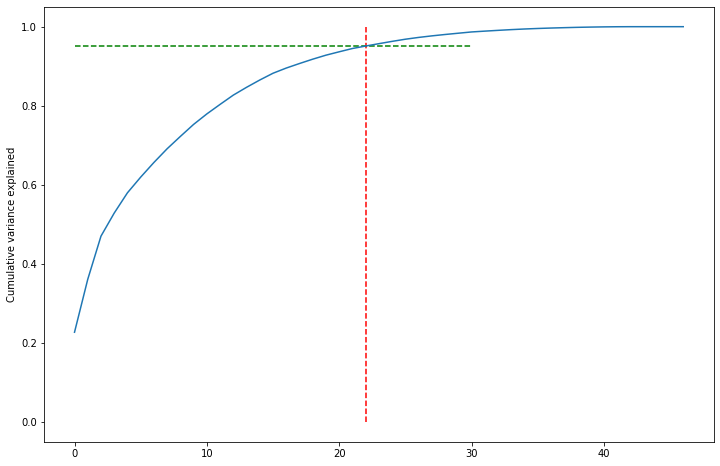

In [676]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=22, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

### Perform PCA with 22 components 
95%variance can be achieved with 22 PCA components.

In [677]:
from sklearn.decomposition import IncrementalPCA

In [678]:
pca_final = IncrementalPCA(n_components=22)
pca_final

IncrementalPCA(batch_size=None, copy=True, n_components=22, whiten=False)

In [679]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca

array([[ 7.32308519,  3.6199872 ,  0.1058884 , ...,  0.63427819,
        -0.77306868,  1.34866153],
       [ 1.12026574,  2.24866648,  0.48724088, ...,  0.974681  ,
         1.6517245 ,  0.12455783],
       [-1.66527917,  1.40057557,  0.94628574, ..., -0.65538551,
         0.33843921, -0.42497517],
       ...,
       [ 3.84547998,  5.8162111 ,  0.79085741, ..., -0.34104585,
         1.23328514,  0.702738  ],
       [ 0.64379048, -1.02561819, -0.66027248, ..., -0.58761558,
         0.47413627, -0.62913422],
       [-2.56601265,  1.20438509, -0.41190341, ...,  0.99185902,
         0.33922557,  0.20815889]])

In [680]:
df_train_pca.shape

(16583, 22)

In [681]:
corrmatrix = np.corrcoef(df_train_pca.transpose())
corrmatrix

array([[ 1.00000000e+00,  4.28658295e-07,  6.28361838e-07,
        -1.47565927e-06, -1.14651943e-06, -2.13812581e-06,
         2.00875652e-06,  1.39734029e-06, -4.94966736e-06,
        -2.01280110e-06,  9.85923675e-07,  1.11366360e-06,
        -1.83865371e-06, -3.59075256e-06,  5.08610988e-06,
         1.05705532e-06,  3.50375403e-07, -1.14734024e-05,
        -7.71868710e-06, -3.13151586e-05,  1.06321981e-05,
        -3.83844794e-05],
       [ 4.28658295e-07,  1.00000000e+00,  3.86164455e-07,
        -5.05659689e-07,  3.74396604e-06, -3.95323196e-06,
         1.33775961e-06, -3.27486505e-06, -2.57235241e-06,
        -3.47088400e-06,  1.96227920e-06, -5.32564810e-06,
        -3.66418028e-06, -5.74690739e-06,  1.03763825e-06,
         6.65248135e-06,  1.48818197e-06, -2.08460656e-05,
        -9.44683629e-06, -3.06494758e-05,  6.60178007e-06,
        -2.30321120e-05],
       [ 6.28361838e-07,  3.86164455e-07,  1.00000000e+00,
        -1.18900999e-06, -3.92701496e-06, -6.23425036e-06,
    

In [682]:
corrmatrix.shape

(22, 22)

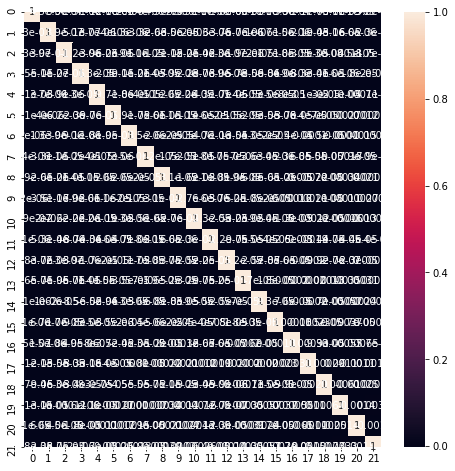

In [683]:
# ploting Heat map for Correlation Matrix
plt.figure(figsize=[8,8])
sns.heatmap(corrmatrix, annot=True)

In [684]:
# Apply the transformation on the test set

X_test = df_test.drop(['mobile_number','circle_id','customer_churn'],axis=1)
y_test = df_test['customer_churn']
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(7107, 22)

#### PCA model has produced => df_test_pca, df_train_pca and y_pred 

### Logistic Regression Algorithm

In [685]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [686]:
learner_pca = LogisticRegression()
learner_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [687]:
model_pca_logistic = learner_pca.fit(df_train_pca, y_train)
model_pca_logistic

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [688]:
# Predict Results from PCA Model
y_pred = learner_pca.predict(df_test_pca)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [689]:
# Prediction on Test Data
pred_probs_test = model_pca_logistic.predict_proba(df_test_pca)
pred_probs_test

array([[0.98453536, 0.01546464],
       [0.99313251, 0.00686749],
       [0.97678821, 0.02321179],
       ...,
       [0.99690467, 0.00309533],
       [0.99183687, 0.00816313],
       [0.94569265, 0.05430735]])

In [690]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.88'

###### AUC score of 0.88

####m Making it a little more unsupervised 
just verifying the number of components found manually from plot with PCA generated components

In [691]:
pca_again = PCA(0.9)

In [692]:
df_train_pca2 = pca_again.fit_transform(X_train)

In [693]:
df_train_pca2.shape

(16583, 18)

In [694]:
learner_pca2 = LogisticRegression()

In [695]:
model_pca2 = learner_pca2.fit(df_train_pca2, y_train)

In [696]:
df_test_pca2 = pca_again.transform(X_test)

In [697]:
df_test_pca2.shape

(7107, 18)

In [698]:
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]

In [699]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.88'

In [700]:
# Predict Results from PCA Model
y_pred = learner_pca.predict(df_test_pca)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [701]:
# Create Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[6493,  108],
       [ 348,  158]], dtype=int64)

## Metrics beyond simply accuracy

In [702]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [703]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.31225296442687744

In [704]:
# Let us calculate specificity
TN / float(TN+FP)

0.9836388425996061

In [705]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.01636115740039388


In [706]:
# positive predictive value 
print (TP / float(TP+FP))

0.5939849624060151


In [707]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9491302441163573


Precision and Recall

Precision
TP / TP + FP

In [708]:
TP/(TP+FP)

0.5939849624060151

##### Recall
TP / TP + FN

In [709]:
TP/(TP+FN)

0.31225296442687744

## Random Forest Algorithm

In [710]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [711]:
# train model
rfc = RandomForestClassifier(n_estimators=22).fit(df_train_pca, y_train)
rfc

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=22,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [712]:
# predict on test set
rfc_pred = rfc.predict(df_test_pca)
rfc_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [713]:
accuracy_score(y_test, rfc_pred)

0.9303503588011819

In [714]:
f1_score(y_test, rfc_pred)

0.2898134863701578

In [715]:
recall_score(y_test, rfc_pred)

0.19960474308300397

### Handling imbalance data
#### SMOTE or Synthetic Minority Oversampling Technique.
SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model.

In [716]:
from imblearn.over_sampling import SMOTE

In [717]:
#Applying SMOTE on TRAIN data set hence using PCA_train(x_train) data and y_train data
sm = SMOTE(random_state=27)
X_train_sm, y_train_sm = sm.fit_sample(df_train_pca, y_train)

In [718]:
X_train_sm

array([[ 7.32308519,  3.6199872 ,  0.1058884 , ...,  0.63427819,
        -0.77306868,  1.34866153],
       [ 1.12026574,  2.24866648,  0.48724088, ...,  0.974681  ,
         1.6517245 ,  0.12455783],
       [-1.66527917,  1.40057557,  0.94628574, ..., -0.65538551,
         0.33843921, -0.42497517],
       ...,
       [-1.99375984, -2.23592941, -2.10462588, ..., -0.008173  ,
        -0.15777161, -0.03027961],
       [ 0.49803551, -0.21046225, -2.63968584, ...,  0.10932587,
        -0.08752869,  0.49133612],
       [-1.60597608, -1.79632259, -2.83612506, ...,  0.53333819,
        -0.11606256,  0.22082768]])

### Logistic Regression

In [719]:
# Applying Logistic regression alogorithm on Balanced Data
lr_smote = LogisticRegression(solver='liblinear').fit(X_train_sm, y_train_sm)
lr_smote

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [720]:
# df_test_pca is PCA_Test data (X_test)
lr_smote_pred = lr_smote.predict(df_test_pca)
lr_smote_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [721]:
# metrics for Logistic Regression model

# accuracy
print("accuracy score: ", metrics.accuracy_score(y_test, lr_smote_pred))

# precision
print("precision: ", metrics.precision_score(y_test, lr_smote_pred))

# recall/sensitivity
print("recall: ", metrics.recall_score(y_test, lr_smote_pred))

# f1 score
print("f1 score: ", metrics.f1_score(y_test, lr_smote_pred))

accuracy score:  0.8301674405515689
precision:  0.26895187870797627
recall:  0.8063241106719368
f1 score:  0.4033613445378151


### Random Forest classifier

In [722]:
# Applying Random Forest Classifier on Balanced data
rfc_smote = RandomForestClassifier(n_estimators=22).fit(X_train_sm, y_train_sm)
rfc_smote


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=22,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [723]:
rfc_smote_pred = rfc_smote.predict(df_test_pca)
rfc_smote_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [724]:
# metrics for RandomForest model

# accuracy
print("accuracy score: ", metrics.accuracy_score(y_test, rfc_smote_pred))

# precision
print("precision: ", metrics.precision_score(y_test, rfc_smote_pred))

# recall/sensitivity
print("recall: ", metrics.recall_score(y_test, rfc_smote_pred))

# f1 score
print("f1 score: ", metrics.f1_score(y_test, rfc_smote_pred))

accuracy score:  0.9168425495989869
precision:  0.4395448079658606
recall:  0.6106719367588933
f1 score:  0.511166253101737


#### Improved recall and f1 score on Balanced data

## SVM

In [725]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [726]:
svm_model = SVC()

In [727]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)
folds

KFold(n_splits=5, random_state=4, shuffle=True)

In [728]:
# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10, 100, 1000]}

In [729]:
# setting up grid search scheme
svm_model_cv = GridSearchCV(estimator = svm_model, param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                       return_train_score=True)
svm_model_cv

GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=True, scoring='accuracy',
             verbose=1)

In [730]:
# fit the model - it will fit 5 folds across all values of C
svm_model_cv.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 12.2min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=True, scoring='accuracy',
             verbose=1)

In [742]:
# results of grid search CV
cv_results = pd.DataFrame(svm_model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,11.174009,0.429630,1.680077,0.033535,0.1,{'C': 0.1},0.856559,0.857050,0.857866,0.851985,...,0.855509,0.002167,5,0.858923,0.857370,0.856063,0.859331,0.858561,0.858050,0.001189
1,9.728982,0.056242,1.371558,0.011683,1,{'C': 1},0.889724,0.892338,0.895442,0.892011,...,0.891877,0.002079,4,0.898991,0.898869,0.897766,0.898297,0.900057,0.898796,0.000767
2,11.475869,0.217725,1.077876,0.000020,10,{'C': 10},0.922398,0.922888,0.923869,0.927136,...,0.923703,0.001810,3,0.937671,0.936650,0.937671,0.937058,0.936489,0.937108,0.000496
3,22.172512,0.470008,0.859186,0.078400,100,{'C': 100},0.943310,0.946741,0.942493,0.947884,...,0.944844,0.002090,2,0.965976,0.965486,0.965119,0.965323,0.965038,0.965389,0.000333
4,63.491818,2.994222,0.613380,0.011011,1000,{'C': 1000},0.952949,0.955890,0.955236,0.955236,...,0.955137,0.001175,1,0.984520,0.984602,0.984234,0.985010,0.984561,0.984585,0.000249


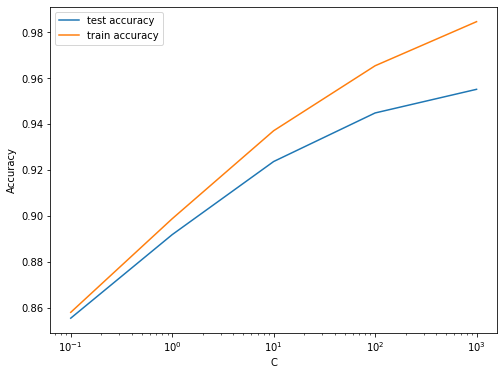

In [732]:
# plot of C versus train and test scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [733]:
best_score = svm_model_cv.best_score_
best_C = svm_model_cv.best_params_['C']

print(" The highest test accuracy is {0} at C = {1}".format(best_score, best_C))

 The highest test accuracy is 0.9551366238375761 at C = 1000


In [743]:
# model with the best value of C
model = SVC(C=best_C)

# fit
model.fit(X_train_sm, y_train_sm)

# predict
y_pred_sm = model.predict(df_test_pca)

In [744]:
# metrics of SVM model using GridsearchCV

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred_sm))

# precision
print("precision", metrics.precision_score(y_test, y_pred_sm))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred_sm))


accuracy 0.8978471929084002
precision 0.35013623978201636
recall 0.5079051383399209


### When we use PCA, Smote and Logistic Regression, we got highest Recall value : 0.80

In [745]:
# recall/sensitivity
print("recall: ", metrics.recall_score(y_test, lr_smote_pred))

recall:  0.8063241106719368


### Let us see for which mobile numbers we got Churn value as 1, so that Telecom Company can take necessary actions to retain them.


In [747]:
y_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Predicted':lr_smote_pred, 'mobile_number':df_test['mobile_number']})


In [748]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Churn,Churn_Predicted,mobile_number
85287,0,0,7001587688
83377,0,0,7000430292
1424,0,0,7001815493
66802,0,0,7000542480
22397,0,0,7001320216


In [749]:
churn_mobile_number = y_pred_final.loc[y_pred_final['Churn_Predicted'] == 1]

In [750]:
churn = churn_mobile_number['mobile_number']
churn

94587    7000434646
96212    7000341342
68178    7001208912
45251    7000108118
27152    7001873660
            ...    
22774    7000549098
8020     7000567154
25865    7000901768
83545    7001382904
1617     7001654693
Name: mobile_number, Length: 1517, dtype: int64


### Above churn is the list of 1517 customers from test data who are predicted to churn the network in the near future. 
Telecom company has to take actions to retain them.